<div class="markdown-google-sans">

# **<font size="6">02. Intermediate Python with Shapely, GeoPandas, and Rasterio</font>**
</div>


*Written by Men Vuthy, 2023*

---



<font color='grey'> ✉ **Message from Trainers:**

*Hello everyone! Welcome to the training about basic Python provided by Geospatialyst - Cambodia. We really appreciate your time and effort in finding out this course and diving yourself into a new environment in dealing with large dataset for your research or work. Hopefully, you will find this course useful and practical for improving the quality of your future study. Good Luck !!* </font> 




<div class="markdown-google-sans">

## **Course overview**
</div>

In this session, we will learn about analyzing geometry, geospatial data, and satellite images.

After this session, you will:
* Understand about Point, LineString, Polygon and other geometries
* Know how to read, write, analyze GIS data like shapefile, geojson, projection, etc
* Know how to  read, write, analyze satellite images like Landsat, etc


**Let's get started !**

*Mount Google Drive*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Setting path of working directory*

In [2]:
cd /content/drive/MyDrive/3. Operation Docs/2. Training Program/2022/3. Python for water engineer/Training Material/Python

/content/drive/MyDrive/3. Operation Docs/2. Training Program/2022/3. Python for water engineer/Training Material/Python


<div class="markdown-google-sans">

## **1. Shapely**
</div>

The most fundamental geometric objects (i.e. Points, Lines and Polygons) are important vector elements in spatial data analysis. In order to read or write these objects in Python, we use a package called <font color='darkred'>**Shapely**</font>. Shapely is a Python package for the manipulation and analysis of two-dimensional geospatial geometries.


**Installation**

*   Anaconda: `conda install shapely --channel conda-forge`
*   Pip: `!pip install shapely`

Check out more:  [Shapely documentation](https://shapely.readthedocs.io/en/stable/manual.html)


### Import module

In [3]:
from shapely.geometry import Point, LineString, Polygon

### Geometry creation

1. Creating point is easy, you just pass x and y coordinates into `Point()` -object as follows:

In [4]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point4 = Point(15.26, -13.456)

# 3-dimension point
point3D = Point(9.26, -2.456, 0.57)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


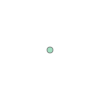

In [5]:
print(point1)
print(point3D)

point3D

In [6]:
# Read x and y coordinates separately
x = point1.x
y = point1.y

print(x)
print(y)
print( x, y)

2.2
4.2
2.2 4.2


In [7]:
# Calculate the distance between point3 and point4
dist = point3.distance(point4)

# Print out result
print("Distance between the points is {0:.3f} units (m or km).".format(dist))

Distance between the points is 12.530 units (m or km).


2. Creating LingString by using `LineString()`  as follows:

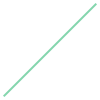

In [8]:
# Create linestring from two points with tuple
line = LineString([(0, 0), (1, 1)])

line

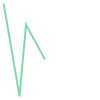

In [9]:
# Create linestring using more than 2 points from Point objects we defined above.
line_ptobj = LineString([point1, point2, point3, point4])
line_tuple = LineString([(2.2, 4.2),  (7.2, -25.1), (9.26, -2.456), (15.26, -13.456)])

line_ptobj

In [10]:
# Get length of the line
length = line_ptobj.length

print("Length of our line: {0:.2f} units".format(length))

Length of our line: 64.99 units


In [11]:
# Get the centroid of the line
print(line_ptobj.centroid)

POINT (7.392524309780676 -11.133489688066074)


3. Creating Polygon by using `Polygon()` as follows:

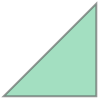

In [12]:
# Create a Polygon from the coordinates
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

polygon

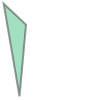

In [13]:
# Create a Polygon from the points we created above
polygon2 = Polygon([(pt.x, pt.y) for pt in (point1, point2, point3)])

polygon2

In [14]:
# Print the outputs
print("Polygon centroid: ", polygon.centroid)
print("Polygon Area: ",  polygon.area)
print("Polygon Bounding Box: ", polygon.bounds)
print("Polygon Exterior: ", polygon.exterior)
print("Polygon Exterior Length: ", polygon.exterior.length)

Polygon centroid:  POINT (0.6666666666666666 0.3333333333333333)
Polygon Area:  0.5
Polygon Bounding Box:  (0.0, 0.0, 1.0, 1.0)
Polygon Exterior:  LINEARRING (0 0, 1 1, 1 0, 0 0)
Polygon Exterior Length:  3.414213562373095


### Geometry collections

In real practice, you will need to store multiplt points, linestrings, or polygons in a collection.
Therefore, it is important to know how to create or analyze more than a single feature using Shapely. 

In Shapely:
* collections of points are created by using a MultiPoint -object
* collections of lines by using a MultiLineString -object
* and collections of polygon by a MultiPolygon -object.

In [15]:
# Import module for creating geometry collections
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 15.26 -13.456)


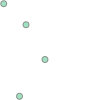

In [16]:
# Create MultiPoint
multi_point = MultiPoint([point1, point2, point3, point4])

print(multi_point)
multi_point

MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456), (9.26 -2.456, 15.26 -13.456))


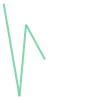

In [17]:
# Create MultiLineString
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
line3 = LineString([point3, point4])

multi_line = MultiLineString([line1, line2, line3])

print(multi_line)
multi_line

MULTIPOLYGON (((1 1, 0.9951847266721969 0.9019828596704393, 0.9807852804032304 0.8049096779838718, 0.9569403357322088 0.7097153227455377, 0.9238795325112867 0.6173165676349102, 0.881921264348355 0.5286032631740023, 0.8314696123025452 0.4444297669803978, 0.773010453362737 0.3656067158363545, 0.7071067811865476 0.2928932188134525, 0.6343932841636455 0.226989546637263, 0.5555702330196023 0.1685303876974548, 0.4713967368259978 0.1180787356516451, 0.3826834323650898 0.0761204674887133, 0.2902846772544623 0.0430596642677911, 0.1950903220161283 0.0192147195967696, 0.0980171403295608 0.0048152733278032, 0.0000000000000001 0, -0.0980171403295606 0.0048152733278031, -0.1950903220161282 0.0192147195967696, -0.2902846772544622 0.0430596642677911, -0.3826834323650897 0.0761204674887133, -0.4713967368259977 0.118078735651645, -0.555570233019602 0.1685303876974545, -0.6343932841636454 0.2269895466372629, -0.7071067811865475 0.2928932188134524, -0.773010453362737 0.3656067158363545, -0.831469612302545

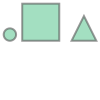

In [18]:
# Create MultiPolygon
point = Point((0,1))
circle = point.buffer(1)

# Triangle
triangle = Polygon([(10,0), (12,4), (14,0)])

# square
square = Polygon([(2,0), (2,6), (8,6), (8,0)])

multi_poly = MultiPolygon([circle, square, triangle])

print(multi_poly)
multi_poly

In [19]:
# Attributes for number of objects and length
print("Number of objects in our MultiPoints:", len(multi_point.geoms))
print("Number of objects in our MultiLine:", len(multi_line.geoms))
print("Number of objects in our MultiPolygon:", len(multi_poly.geoms))

Number of objects in our MultiPoints: 4
Number of objects in our MultiLine: 3
Number of objects in our MultiPolygon: 3


In [20]:
# Attributes for number of objects and length
print("Length of objects in our MultiLineString", (multi_line.length))

Length of objects in our MultiLineString 64.99103321553724


In [21]:
# Attributes for area
print("Area of our MultiPolygon:", multi_poly.area)

Area of our MultiPolygon: 47.13654849054594


<div class="markdown-google-sans">

## **2. GeoPandas**
</div>


<font color='darkred'>**GeoPandas**</font> is a module to ease the work with geospatial data in Python easier. This module is extended from `pandas` module to allow spatial operations on geometric objects. In previous session, geometric operations are performed by `shapely`, but `Geopandas` further depends on `fiona` for file access and `matplotlib` for plotting. It actually combines the capabilities of `pandas` and `shapely`, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. 

**Installation**

*   Anaconda: `conda install -c conda-forge geopandas`
*   Pip: `!pip install geopandas`

Check out more:  [GeoPandas documentation](https://geopandas.org)


In [ ]:
!pip install geopandas
!pip install proplot

### import modules

In [23]:
import geopandas as gpd
import proplot as pplt

/usr/local/lib/python3.8/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


### Reading vector files

Read shapefile

In [24]:
# Set filepath
fp = "data/provisional_census2019/provisional_census2019.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

data.head()

ogc_fid  pro_code   province_k        provinces  households      males  \
0        1         4  កំពង់ឆ្នាំង  Kampong Chhnang    122925.0   251895.0   
1        2         8       កណ្តាល           Kandal    273111.0   580129.0   
2        3        12      ភ្នំពេញ       Phnom Penh    399203.0  1039192.0   
3        4        14      ព្រៃវែង        Prey Veng    227008.0   501346.0   
4        5        20     ស្វាយរៀង       Svay Rieng    131937.0   249446.0   

     females      total  house_size  area_km2  pop_km2  \
0   274037.0   525932.0         4.3      5521       95   
1   615418.0  1195547.0         4.4      3179      376   
2  1090179.0  2129371.0         5.3       679     3136   
3   556082.0  1057428.0         4.7      4883      217   
4   275108.0   524554.0         4.0      2966      177   

                                       reference  \
0  Provisional_Population_Census__00.06.2019.pdf   
1  Provisional_Population_Census__00.06.2019.pdf   
2  Provisional_Population_Census__00.06.2019.pdf   
3  Provisional_Population_Census__00.06.2019.pdf   
4  Provisional_Population_Census__00.06.2019.pdf   

                                            geometry  
0  MULTIPOLYGON (((440280.561 1383585.909, 440090...  
1  POLYGON ((481223.477 1313362.233, 481407.227 1...  
2  POLYGON ((491536.140 1297379.094, 491748.953 1...  
3  POLYGON ((536011.301 1311635.984, 536169.301 1...  
4  POLYGON ((587996.231 1282290.102, 588224.731 1...

Read GeoJSON

In [25]:
# Set filepath
fp = "data/provisional_census2019/provisional_census2019.geojson"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

data.head()

ogc_fid  pro_code   province_k        provinces  households      males  \
0        1         4  កំពង់ឆ្នាំង  Kampong Chhnang    122925.0   251895.0   
1        2         8       កណ្តាល           Kandal    273111.0   580129.0   
2        3        12      ភ្នំពេញ       Phnom Penh    399203.0  1039192.0   
3        4        14      ព្រៃវែង        Prey Veng    227008.0   501346.0   
4        5        20     ស្វាយរៀង       Svay Rieng    131937.0   249446.0   

     females      total  house_size  area_km2  pop_km2  \
0   274037.0   525932.0         4.3      5521       95   
1   615418.0  1195547.0         4.4      3179      376   
2  1090179.0  2129371.0         5.3       679     3136   
3   556082.0  1057428.0         4.7      4883      217   
4   275108.0   524554.0         4.0      2966      177   

                                       reference  \
0  Provisional_Population_Census__00.06.2019.pdf   
1  Provisional_Population_Census__00.06.2019.pdf   
2  Provisional_Population_Census__00.06.2019.pdf   
3  Provisional_Population_Census__00.06.2019.pdf   
4  Provisional_Population_Census__00.06.2019.pdf   

                                            geometry  
0  MULTIPOLYGON (((440280.561 1383585.908, 440090...  
1  MULTIPOLYGON (((481223.477 1313362.233, 481407...  
2  MULTIPOLYGON (((491536.140 1297379.094, 491748...  
3  MULTIPOLYGON (((536011.301 1311635.984, 536169...  
4  MULTIPOLYGON (((587996.231 1282290.102, 588224...

### Plotting vector

Besides reading in dataframe, you can also quickly plot the data based on its shapes or geometries by using `.plot()` fuction from geopandas because `Geopandas` provides a high-level interface to the `matplotlib` library for making maps. 

Read more about plotting [geopandas.GeoDataframe](https://geopandas.org/docs/user_guide/mapping.html).

In [26]:
import matplotlib.pyplot as plt

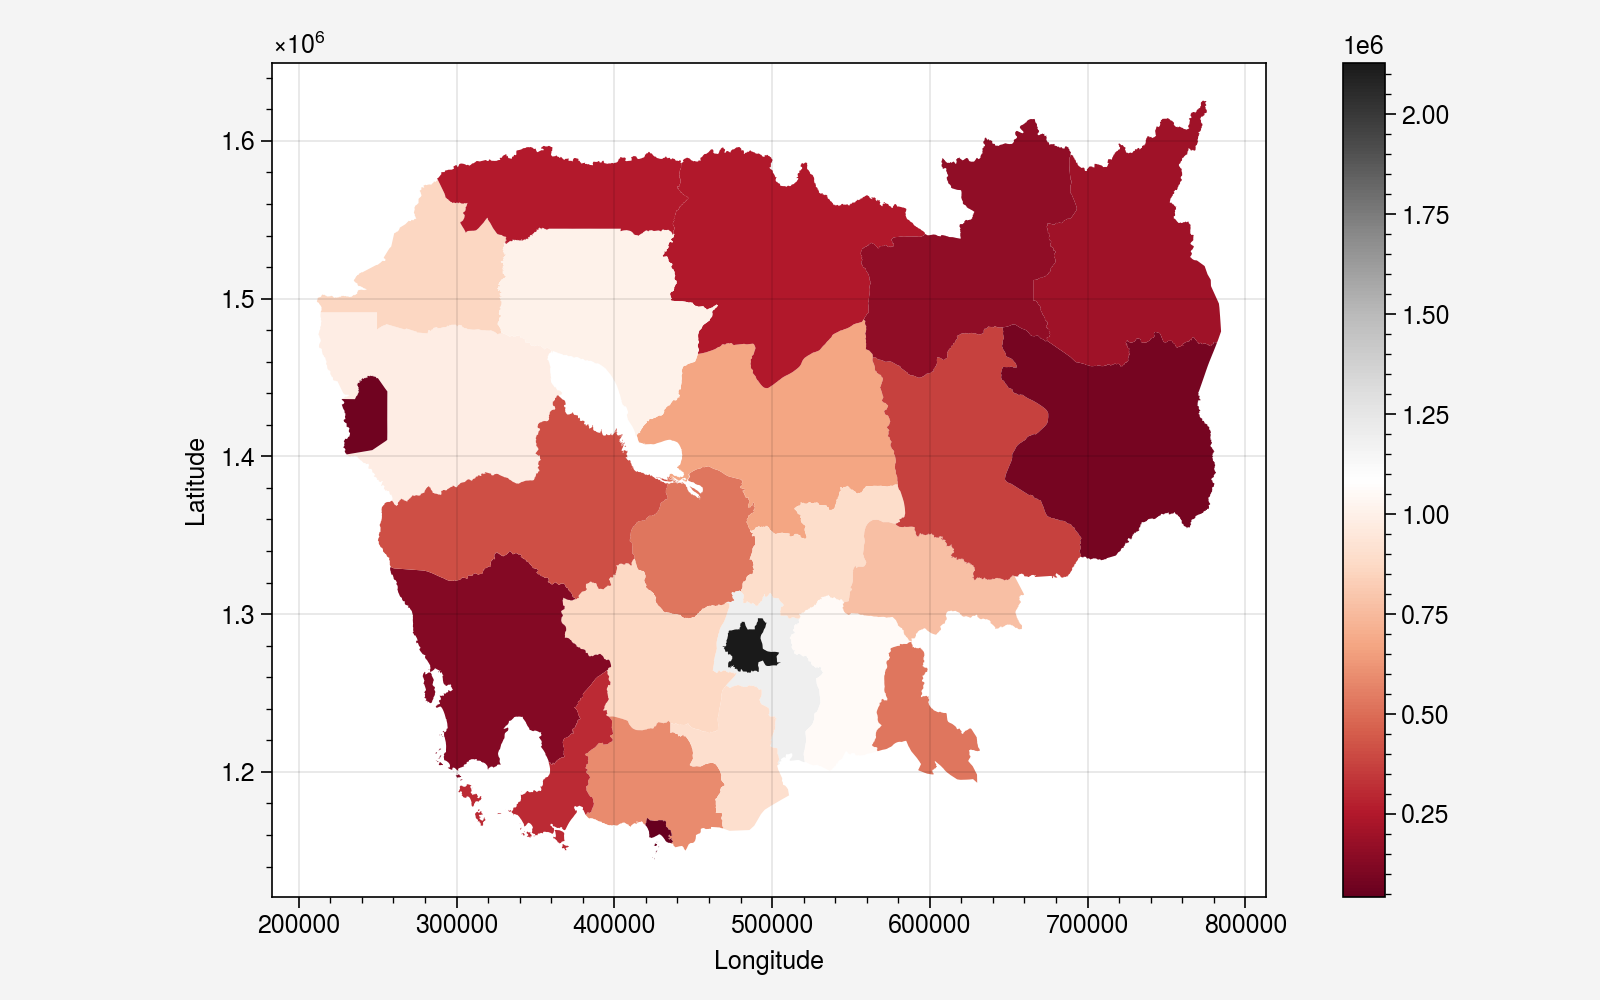

In [27]:
# Make figure
fig, ax = plt.subplots(figsize=(8, 5))

# input data for plotting
data.plot(ax=ax, column='total', legend=True, cmap='rdgy')

# set label x and y
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove empty white space around the plot
plt.tight_layout()

# save figure (jpg, png, pdf, etc)
plt.savefig('output/cambo_pop.png', dpi = 150)  # dpi is for setting image quality

plt.show();

### Analyze vector

In [28]:
# Check projection of data by using .crs
data.crs

<Derived Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# Check all column names
data.columns

Index(['ogc_fid', 'pro_code', 'province_k', 'provinces', 'households', 'males',
       'females', 'total', 'house_size', 'area_km2', 'pop_km2', 'reference',
       'geometry'],
      dtype='object')

In [30]:
# Check the number of rows or length of data
len(data)

25

In [31]:
# Select Phnom Penh
data.loc[data['provinces'] == 'Phnom Penh'] # or data.loc[data['provinces'] == 'Phnom Penh']

ogc_fid  pro_code province_k   provinces  households      males    females  \
2        3        12    ភ្នំពេញ  Phnom Penh    399203.0  1039192.0  1090179.0   

       total  house_size  area_km2  pop_km2  \
2  2129371.0         5.3       679     3136   

                                       reference  \
2  Provisional_Population_Census__00.06.2019.pdf   

                                            geometry  
2  MULTIPOLYGON (((491536.140 1297379.094, 491748...

In [32]:
# Calculate area of polygon in square km
area_pp = data['geometry'][2].area/1000000

area_pp

684.3447598239339

In [33]:
# Let's create a new column for area and calculate area of all polygons in km2 using dataframe.area 
data['area'] = data.area/1000000

data['area'].head()

0    5295.150767
1    3253.310484
2     684.344760
3    4761.436372
4    2868.244685
Name: area, dtype: float64

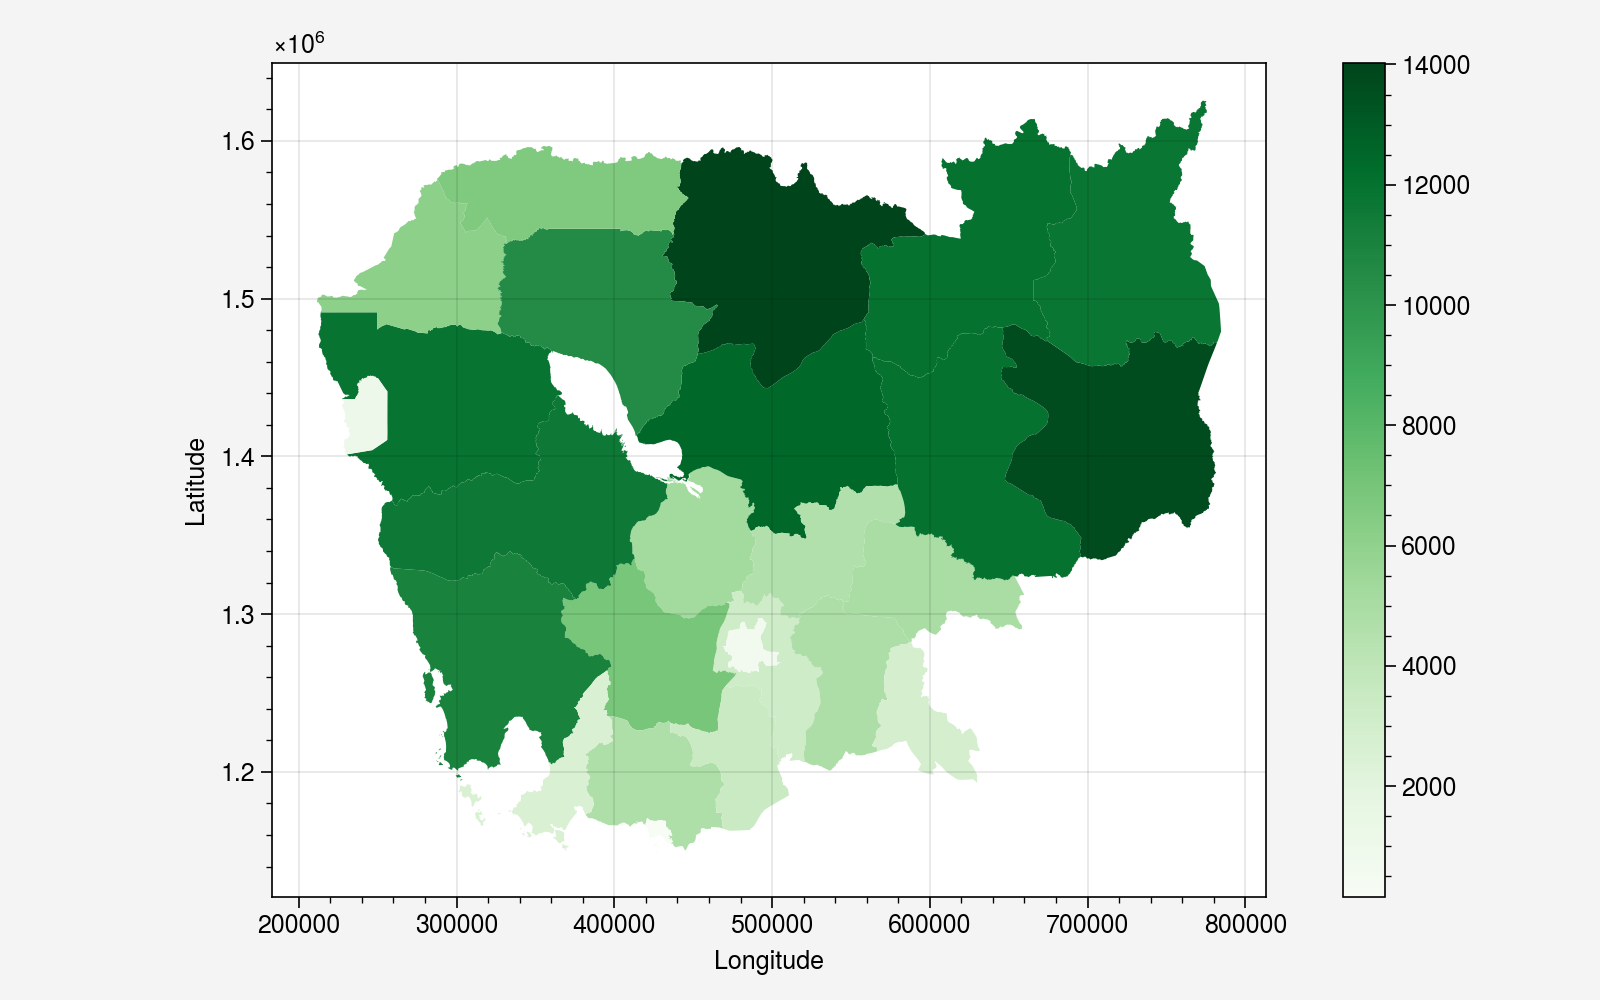

In [34]:
# Make figure
fig, ax = plt.subplots(figsize=(8, 5))

# input data for plotting
data.plot(ax=ax, column='area', legend=True, cmap='greens')

# set label x and y
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove empty white space around the plot
plt.tight_layout()

# save figure (jpg, png, pdf, etc)
plt.savefig('output/cambo_area.png', dpi = 150)  # dpi is for setting image quality

plt.show();

### Projection

**Map projection** is a concept of tranforming points from three-dimensional Earth's surface (3D) into plane surface (2D). Whereas, a **coordinate reference system (CRS)** defines how the two-dimensional map relates to real places on the earth, and it is a very important information for analyzing a geodataframe in Python. Deciding the type of map projection and which CRS to use depends on the regional extent of the area you want to work in and on the analysis you want to do.

When working on real data, sometimes you might have problem with CRS difference (i.e. one might have coordinates in meter, while the other in decimal degrees). In this case, CRS can be reprojected easily in Python to make all coordinates compatible. After all layers have the same CRS, you will be able to analyze the spatial relationship between layers correctly, for example, when making a clip, union, interection, difference, or other type of analysis.


You can find a lot of information and lists of available coordinate reference systems from:

* [www.arcgis.com](https://www.arcgis.com/apps/MapJournal/index.html?appid=31484c80dba54a058369dfb8e9ced549)
* www.spatialreference.org
* www.proj4.org
* www.mapref.org

In [35]:
# Let's make a copy of our data
orig_crs = data.copy()

# Re-project from EPSG:32648 to EPSG:4326 
new_crs = orig_crs.to_crs(epsg=4326)

# Check the new projection
new_crs.head()

ogc_fid  pro_code   province_k        provinces  households      males  \
0        1         4  កំពង់ឆ្នាំង  Kampong Chhnang    122925.0   251895.0   
1        2         8       កណ្តាល           Kandal    273111.0   580129.0   
2        3        12      ភ្នំពេញ       Phnom Penh    399203.0  1039192.0   
3        4        14      ព្រៃវែង        Prey Veng    227008.0   501346.0   
4        5        20     ស្វាយរៀង       Svay Rieng    131937.0   249446.0   

     females      total  house_size  area_km2  pop_km2  \
0   274037.0   525932.0         4.3      5521       95   
1   615418.0  1195547.0         4.4      3179      376   
2  1090179.0  2129371.0         5.3       679     3136   
3   556082.0  1057428.0         4.7      4883      217   
4   275108.0   524554.0         4.0      2966      177   

                                       reference  \
0  Provisional_Population_Census__00.06.2019.pdf   
1  Provisional_Population_Census__00.06.2019.pdf   
2  Provisional_Population_Census__00.06.2019.pdf   
3  Provisional_Population_Census__00.06.2019.pdf   
4  Provisional_Population_Census__00.06.2019.pdf   

                                            geometry         area  
0  MULTIPOLYGON (((104.45035 12.51519, 104.44859 ...  5295.150767  
1  MULTIPOLYGON (((104.82759 11.88065, 104.82928 ...  3253.310484  
2  MULTIPOLYGON (((104.92232 11.73615, 104.92428 ...   684.344760  
3  MULTIPOLYGON (((105.33064 11.86490, 105.33209 ...  4761.436372  
4  MULTIPOLYGON (((105.80715 11.59858, 105.80925 ...  2868.244685

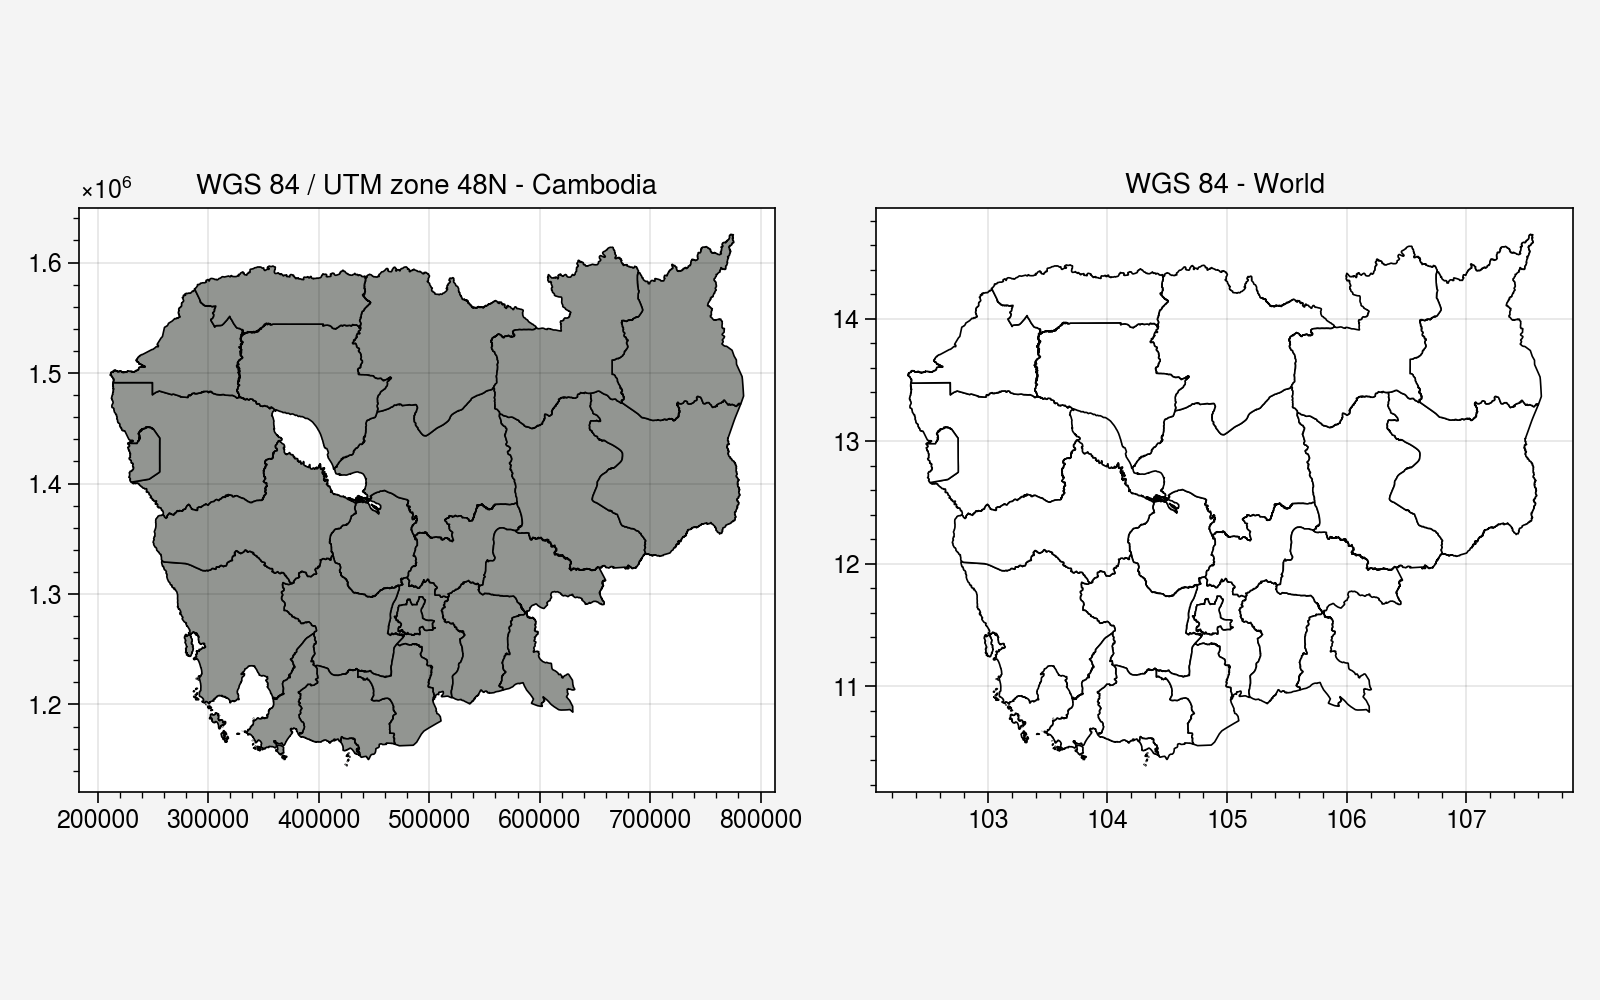

In [36]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Plot the data in WGS84-Cambodia projection
orig_crs.plot(ax=ax1, facecolor='gray', edgecolor="black");

# Add title
ax1.set_title("WGS 84 / UTM zone 48N - Cambodia");

# Plot the one with WGS84-World projection
new_crs.plot(ax=ax2, facecolor='white', edgecolor="black");

# Add title
ax2.set_title("WGS 84 - World");

# Remove empty white space around the plot
plt.tight_layout()

# save figure (jpg, png, pdf, etc)
plt.savefig('output/cambo_projection.png', dpi = 150)  # dpi is for setting image quality

plt.show()


In [37]:
# Define output path
outfp = 'output/cambodia_census_epsg4326.json'

# Save file
new_crs.to_file(outfp, driver='GeoJSON')

### Geometric operation

Load dataset

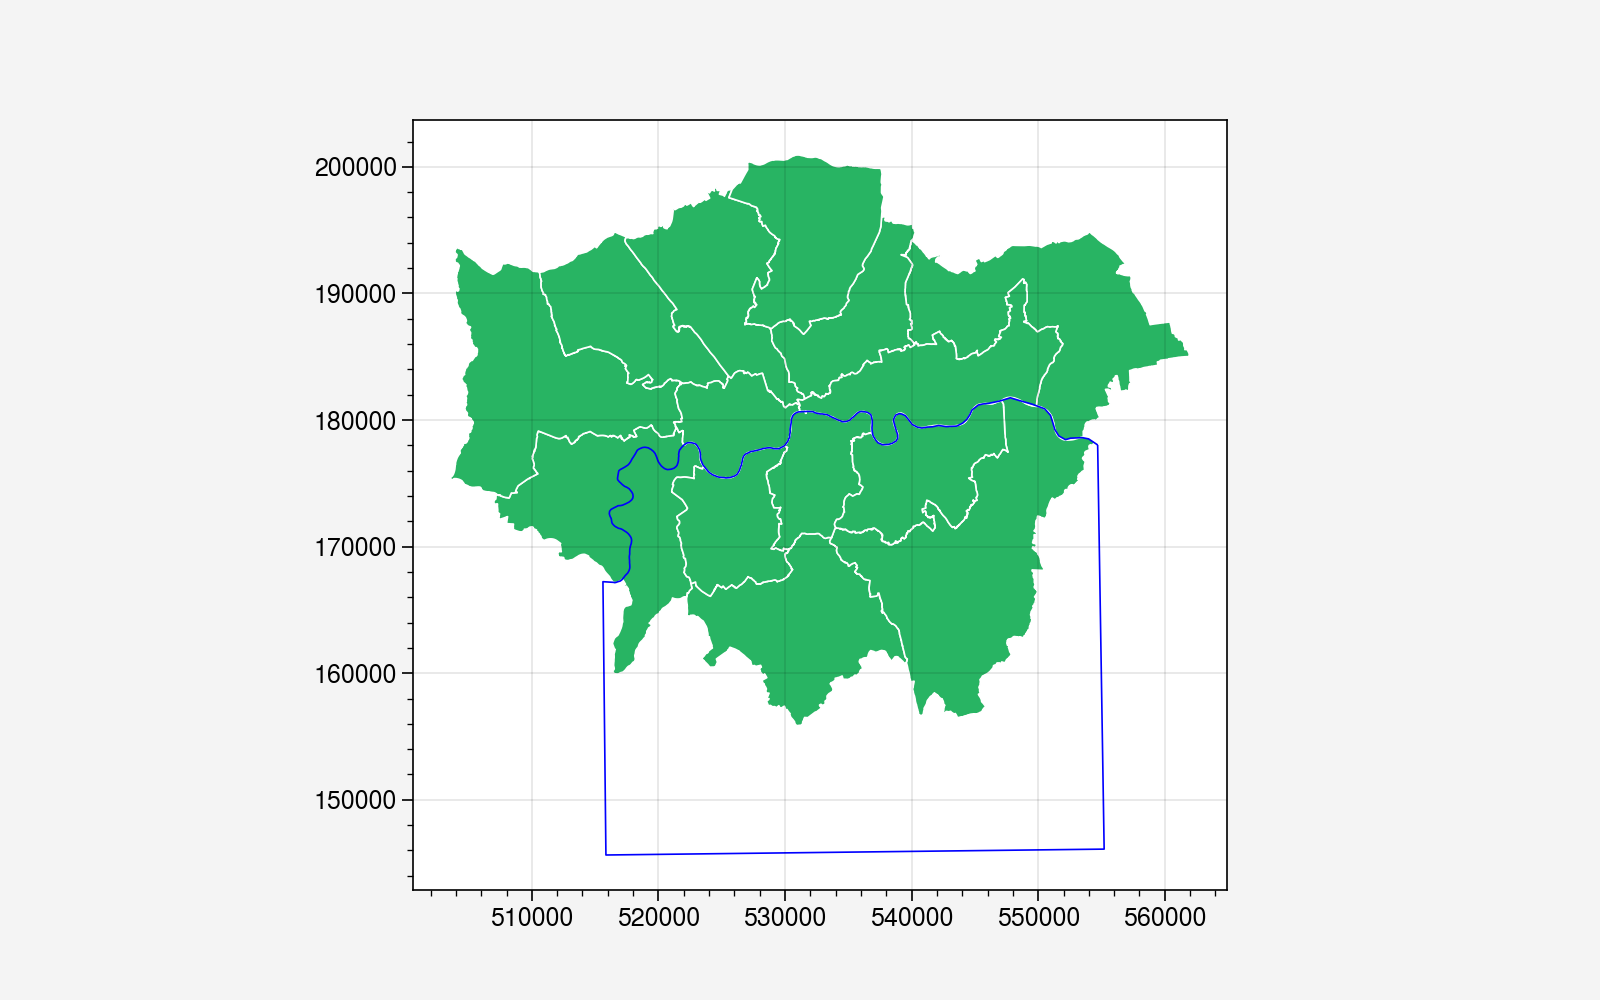

In [40]:
# Set file paths
border_fp = "data/London_data/greater_london_const_region.shp"
south_river_fp = "data/London_data/south-area.shp"

# Read files
border = gpd.read_file(border_fp)
south_river = gpd.read_file(south_river_fp)

# Plot the layers
fig, ax = plt.subplots(figsize=(8, 5))
border.plot(ax=ax, facecolor='#28B463', edgecolor='white')
south_river.plot(ax=ax, facecolor='None', edgecolor='blue')

plt.show()

The green area is London city which we want to use for conducting overlay analysis, while the blue polygon is the boundary of the southern area of Thames river. 

We will clip the green area within the blue polygon by using a function called [`overlay()`](https://geopandas.org/docs/user_guide/set_operations.html) from `geopandas`. This function takes few inputs such as:

1. geometries data (i.e. the data we want to clip or make difference)
2. boundary geometries (i.e. area for clipping or making difference)
3. type of overlay operation: `how` (i.e. `how=intersection`, `how=difference`, `how=union` and `how=symmetric_difference`)

In [41]:
# Ensure that the CRS matches, if not raise an AssertionError
assert border.crs == south_river.crs, "CRS are not the same between layers!"

Intersection

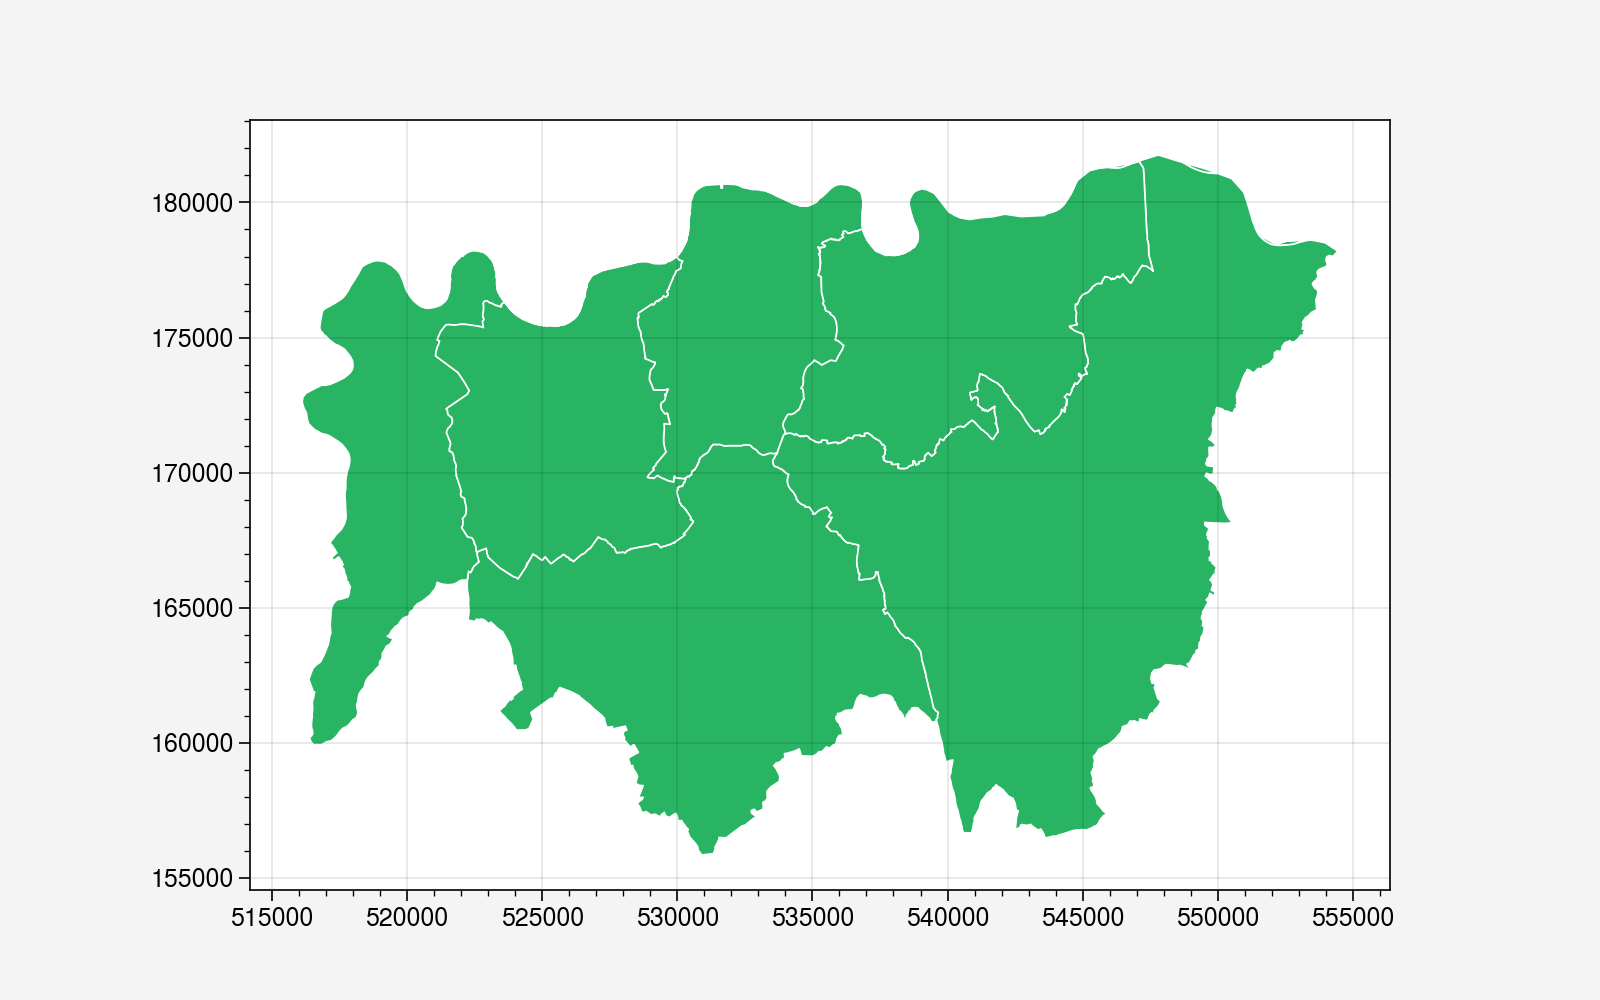

In [45]:
# Extract intersection area
intersection = gpd.overlay(border, south_river, how='intersection')

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
intersection.plot(ax=ax, facecolor='#28B463', edgecolor='white');

Difference

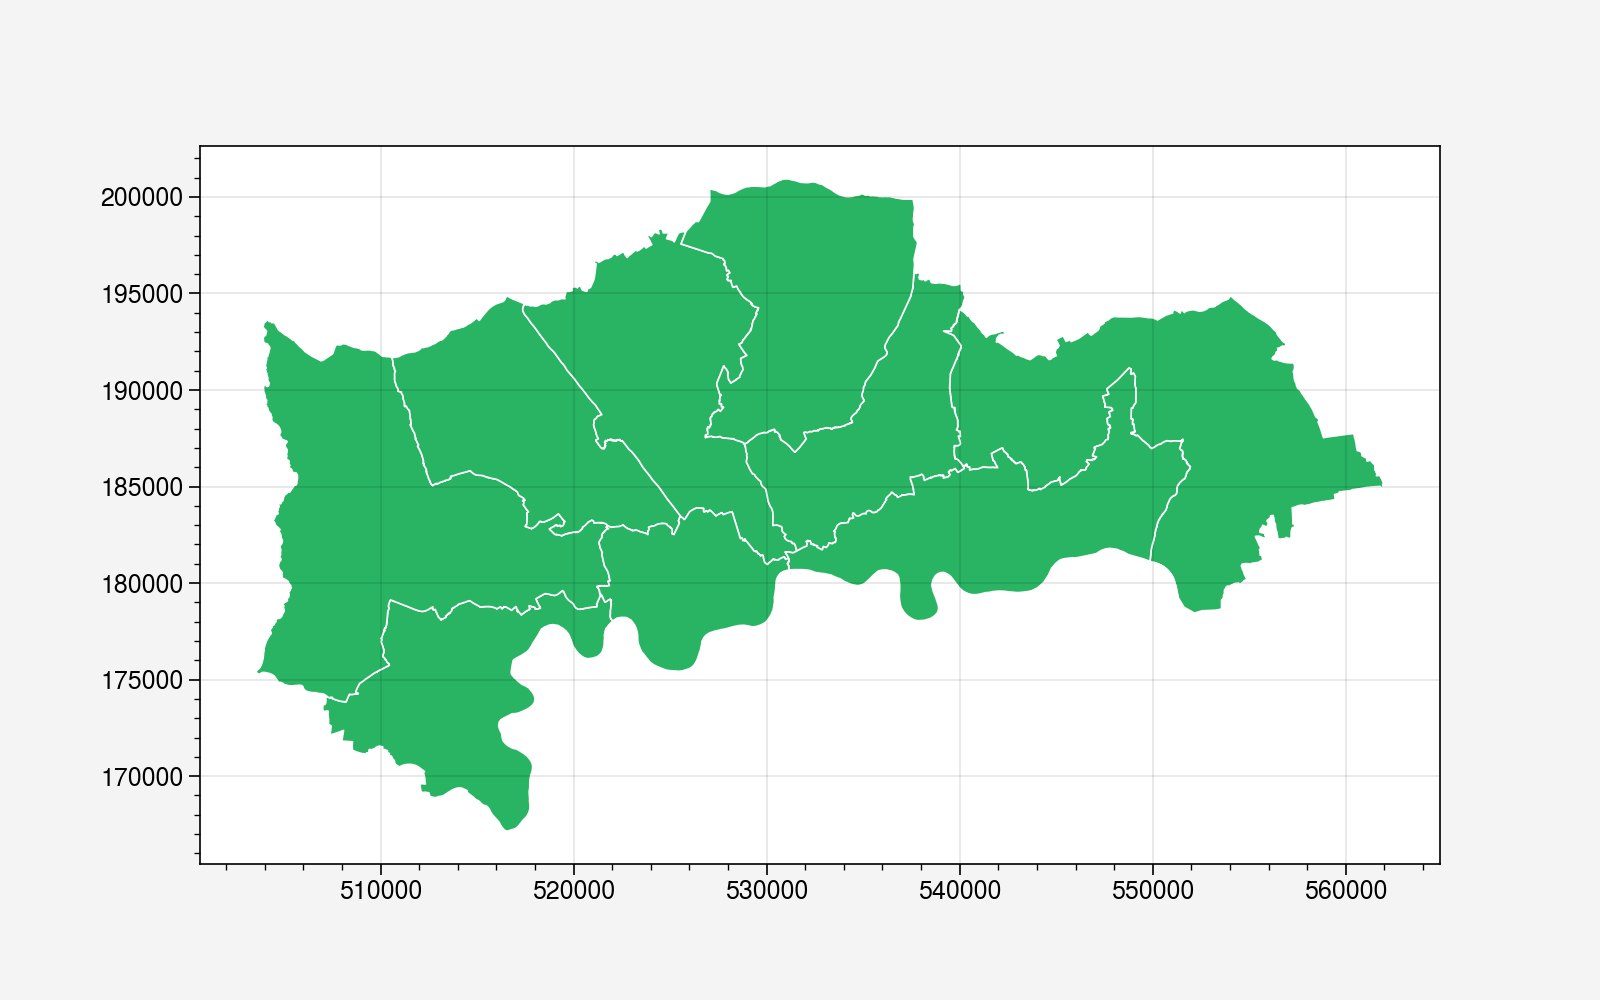

In [46]:
# Extract difference area
difference = gpd.overlay(border, south_river, how='difference')

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
difference.plot(ax=ax, facecolor='#28B463', edgecolor='white');

Union

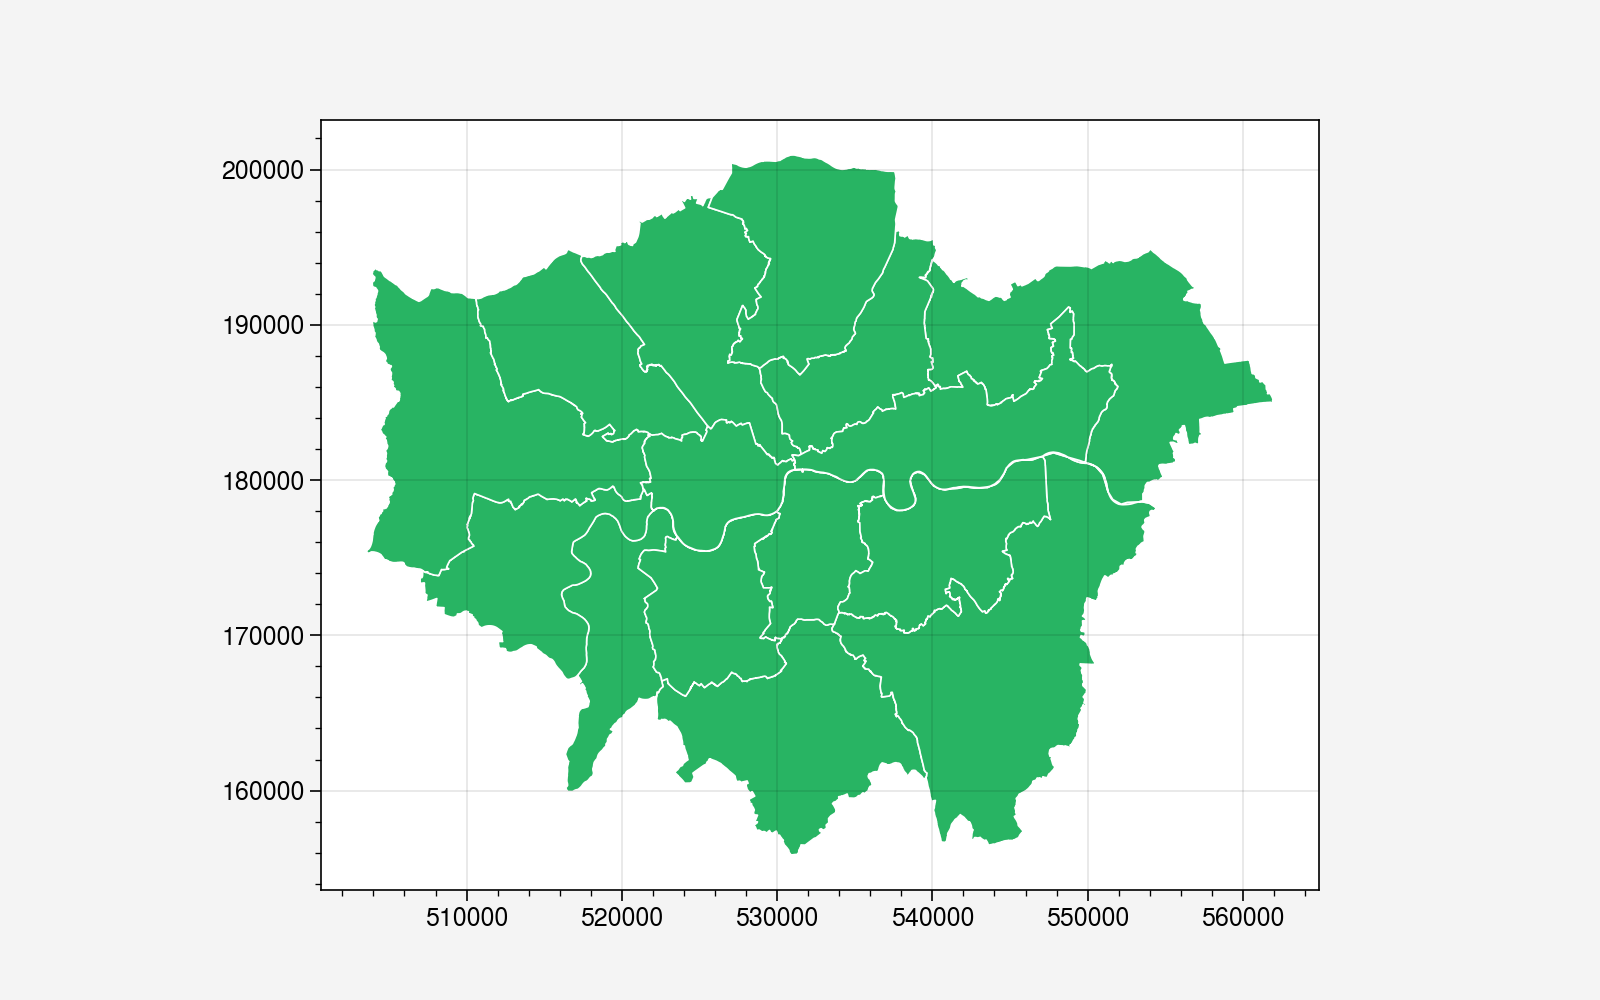

In [47]:
# Create union
union = gpd.overlay(intersection, difference, how='union', keep_geom_type=True)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
union.plot(ax=ax, facecolor='#28B463', edgecolor='white');

<div class="markdown-google-sans">

## **3. Rasterio**
</div>

<font color='darkred'>**Rasterio**</font> is a GDAL and Numpy-based Python library used for processing raster data and analysis. With Rasterio, we can read and write many different [raster formats](https://gdal.org/drivers/raster/index.html) in Python. Most common file formats include for example `TIFF` and `GeoTIFF`, `ASCII Grid` and `Erdas Imagine .img` -files.

In this section, we will use Landsat 8 image retrieved from Google Earth Engine. You can download the image via my code [here](https://code.earthengine.google.com/bc661c85eec5206f75826a729c37eb07).

**Installation**

*   Windows and OS X: [Installation](https://rasterio.readthedocs.io/en/latest/installation.html)
*   Pip: `!pip install rasterio`

Check out more:  [Rasterio documentation](https://rasterio.readthedocs.io/en/latest/index.html) 


In [48]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 71.6 MB/s eta 0:00:00


### Import module

In [68]:
import rasterio
import numpy as np

### Load dataset

In [52]:
# file path
raster_fp = 'data/image_data/landsat_angkorwat.tif'

# open file with rasterio
image = rasterio.open(raster_fp)

image

<open DatasetReader name='data/image_data/landsat_angkorwat.tif' mode='r'>

Read image properties

In [60]:
# Check meta
image.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 767,
 'height': 354,
 'count': 12,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, 103.73924564069058,
        0.0, -0.00026949458523585647, 13.483622583105607)}

In [55]:
# Check projection
image.crs

CRS.from_epsg(4326)

In [56]:
# Number of bands
image.count

12

In [58]:
# Dimensions
print(image.width)
print(image.height)

767
354


In [59]:
# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
image.transform

Affine(0.00026949458523585647, 0.0, 103.73924564069058,
       0.0, -0.00026949458523585647, 13.483622583105607)

### Read raster band

Raster dataset normally consists a stack of many different bands. As you have checked the bands above, there are 12 bands in our raster file. Each band represents a color or has its own wavelength range. The description of Landsat 8 bands are written in [USGS Landsat 8 Surface Reflectance Tier 1](https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LC08_C01_T1_SR#bands).


<img src="https://drive.google.com/uc?id=1TFqCdNKeUUdzijKgCCzWhTCz-MX-EJh2&authuser=1&usp=drive_link" width="700"/>


We can easily read the array of each band by using `raster.read()` and also manipulate the array in same way as numpy array. Now, let's have a look at the values in each band.


In [63]:
# Read band 1, 2, and 3
band2 = image.read(2)
band3 = image.read(3)
band4 = image.read(4)

In [69]:
# Basic statistics
print('min:', band2.min())
print('mean:', band2.mean())
print('median:', np.median(band2))
print('max:', band2.max())

min: 102.5
mean: 512.1138653790908
median: 525.5
max: 1769.0


### Visualize raster

To visualize raster data, we generally use `plot.show()`, a function in `rasterio` module and `pyplot.imshow()`, a function in `matplotlib` module. These functions allows us to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents. Now, let's try to visualize our raster data based on the instruction in [Plotting - rasterio documentation](https://rasterio.readthedocs.io/en/latest/topics/plotting.html).

In [83]:
from rasterio.plot import show
import matplotlib.pyplot as plt

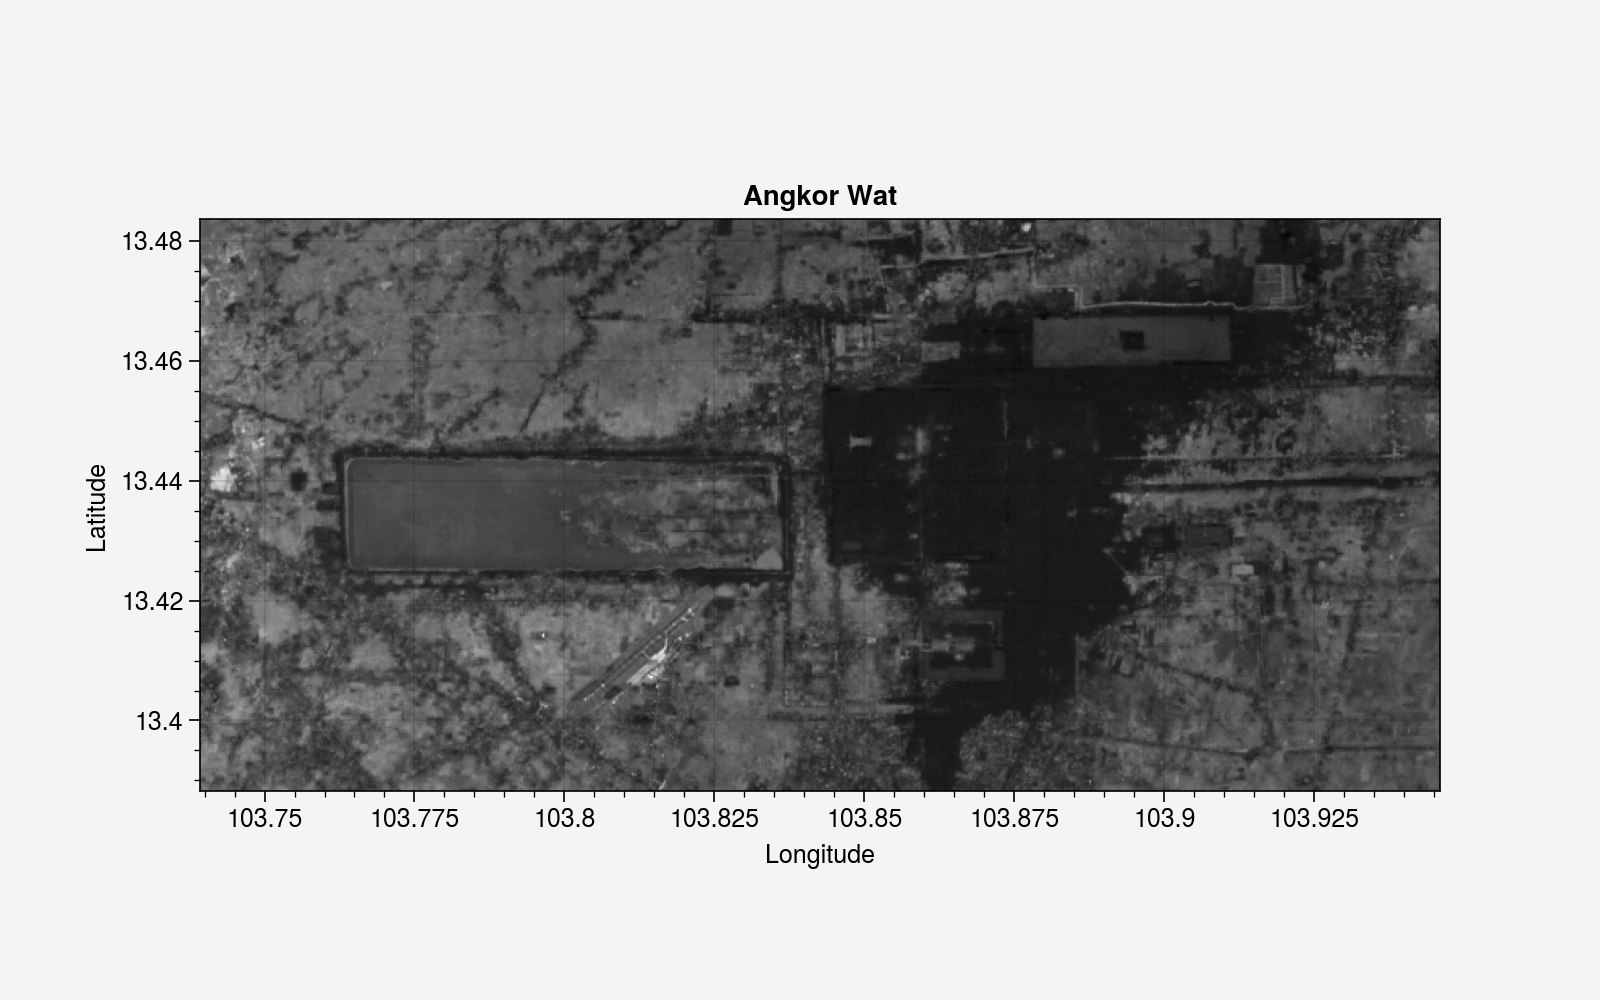

In [84]:
# Plotting image band
fig, ax = plt.subplots(figsize=(8, 5))

show((image,1), ax=ax, cmap='gray', title = 'Angkor Wat')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show();

Let’s see how Red, Green, Blue bands look like by placing them next to each other. 
* Band 4 = Red
* Band 3 = Green
* Band 2 = Blue


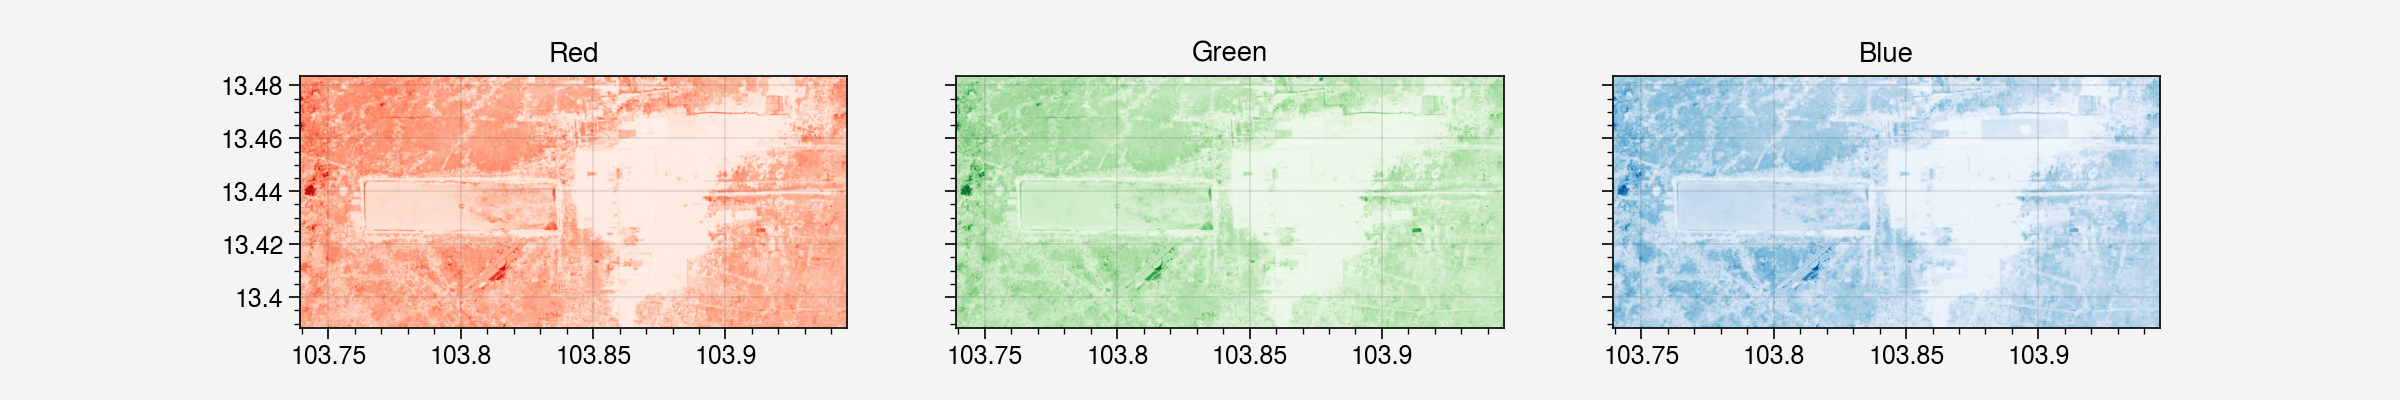

In [88]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(12, 2), sharey=True)

# Plot Red, Green and Blue
show((image, 4), cmap='Reds', ax=ax1)
show((image, 3), cmap='Greens', ax=ax2)
show((image, 2), cmap='Blues', ax=ax3)

# Set titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

plt.show();

### Color composite

Here we will learn how to make composite of bands to become a natural or false color image based on the channel combination. Following the band combination in [Natural and False Color Composites](https://www.usna.edu/Users/oceano/pguth/md_help/html/satb4dv6.htm), we know which bands are used to combine to serve for specific purpose. As for Landsat 8 image, Natural color composite will use band 4, 3 and 2; while False color composite will use band 5, 3 and 2.

Before making composite, let's normalize the band array value to range between 0.0 and 1.0.

Normalize raster band

The Normalization equation is as follows: 

<img src="https://drive.google.com/uc?id=1KZ3vBSO2I5545KnCgulF9hd9f0MG3wVt&authuser=1&usp=drive_link" width="500"/>

In [92]:
# Function to normalize the grid values
def normalize(band):
    # Calculate min and max of band
    band_max, band_min = np.nanmax(band), np.nanmin(band)
    
    # Normalizes numpy arrays into scale 0.0 - 1.0
    return ((band - band_min)/(band_max - band_min))

In [94]:
# Read the band into numpy arrays
red = image.read(4)

# Normalize the bands
norm_red = normalize(red)

print('min:',norm_red.min())
print('max:', norm_red.max())

min: 0.0
max: 1.0


In [105]:
# Read all band into numpy arrays
blue = image.read(2)
green = image.read(3)
red = image.read(4)
nir = image.read(5)

In [106]:
# Normalize all bands for natural  color composite
nblue = normalize(blue)
ngreen = normalize(green)
nred = normalize(red)
nnir = normalize(nir)

Natural color composite

In [97]:
# Create RGB natural color composite
RGB_composite = np.dstack((nred, ngreen, nblue))

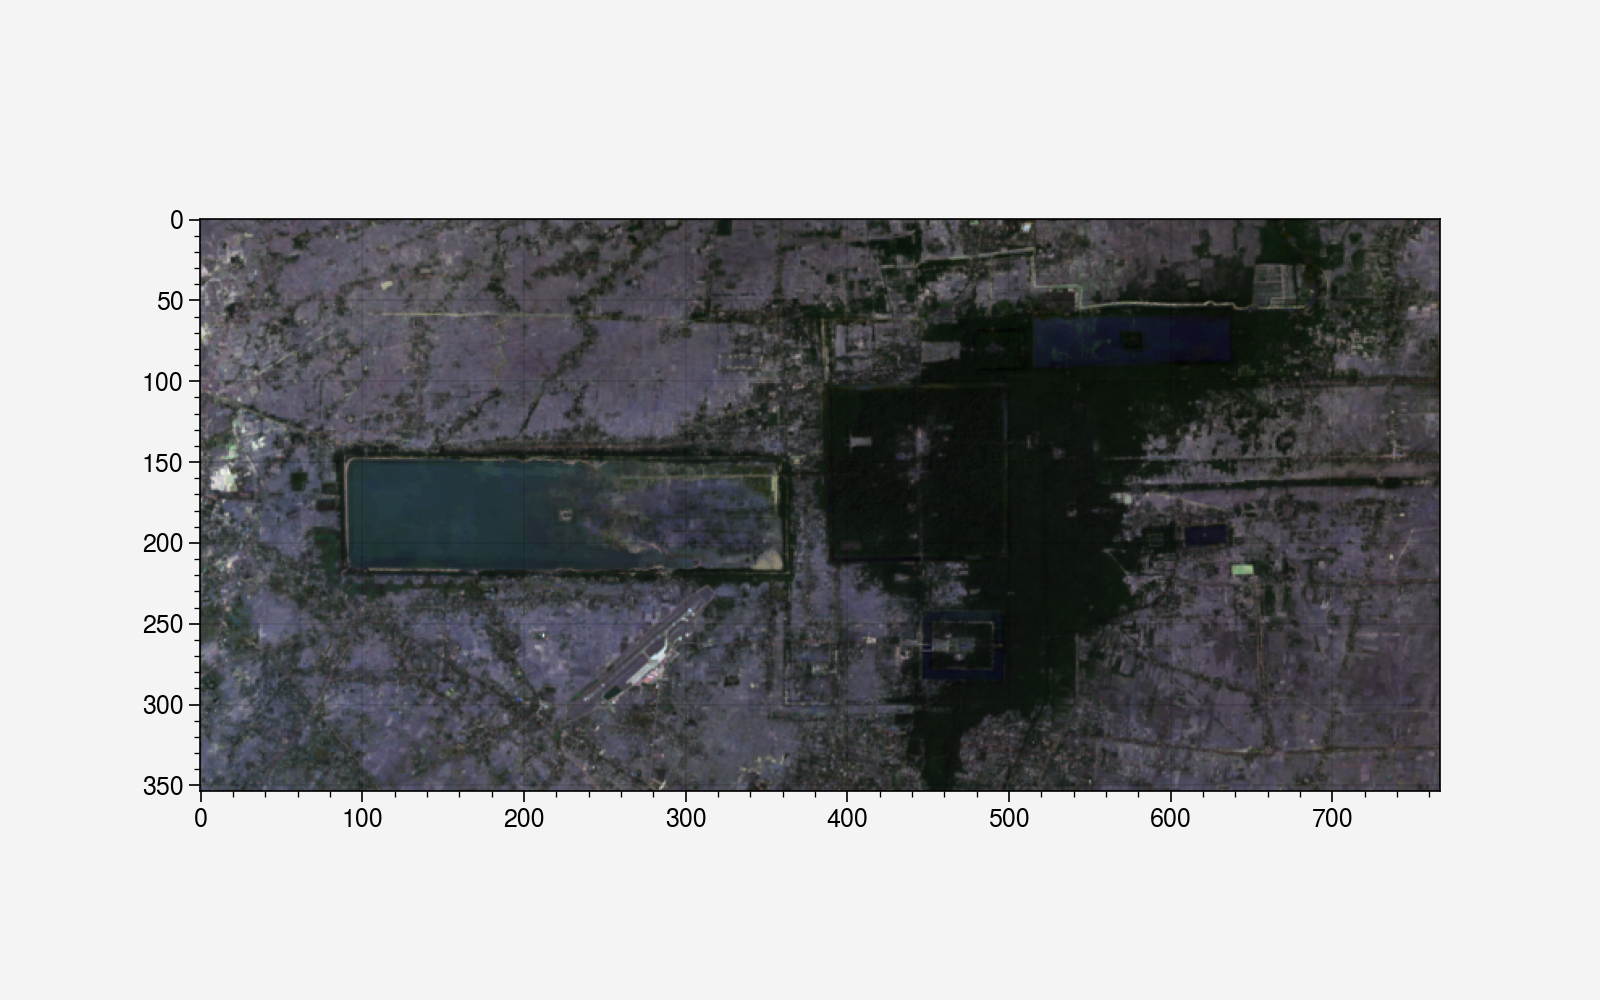

In [103]:
# Let's see how our color composite looks like
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(RGB_composite);

False color composite

In [107]:
# Create false color composite
False_composite = np.dstack((nnir, ngreen, nblue))

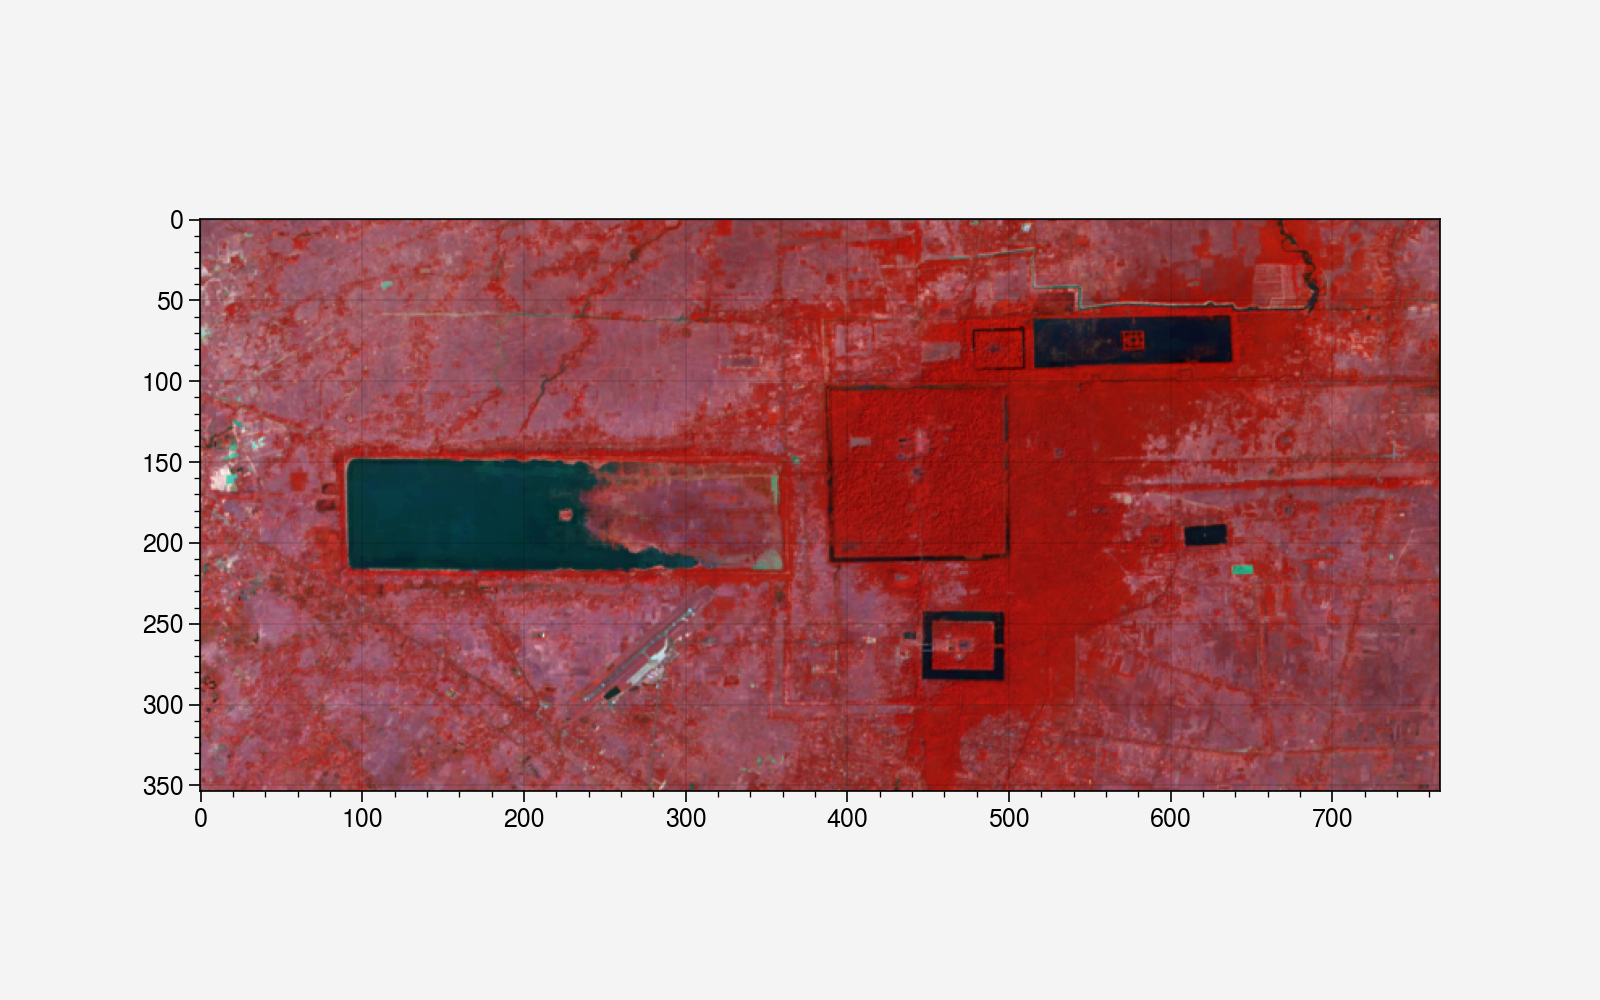

In [108]:
# Let's see how our color composite looks like
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(False_composite);

### Masking or clipping raster data

Load shapefile data

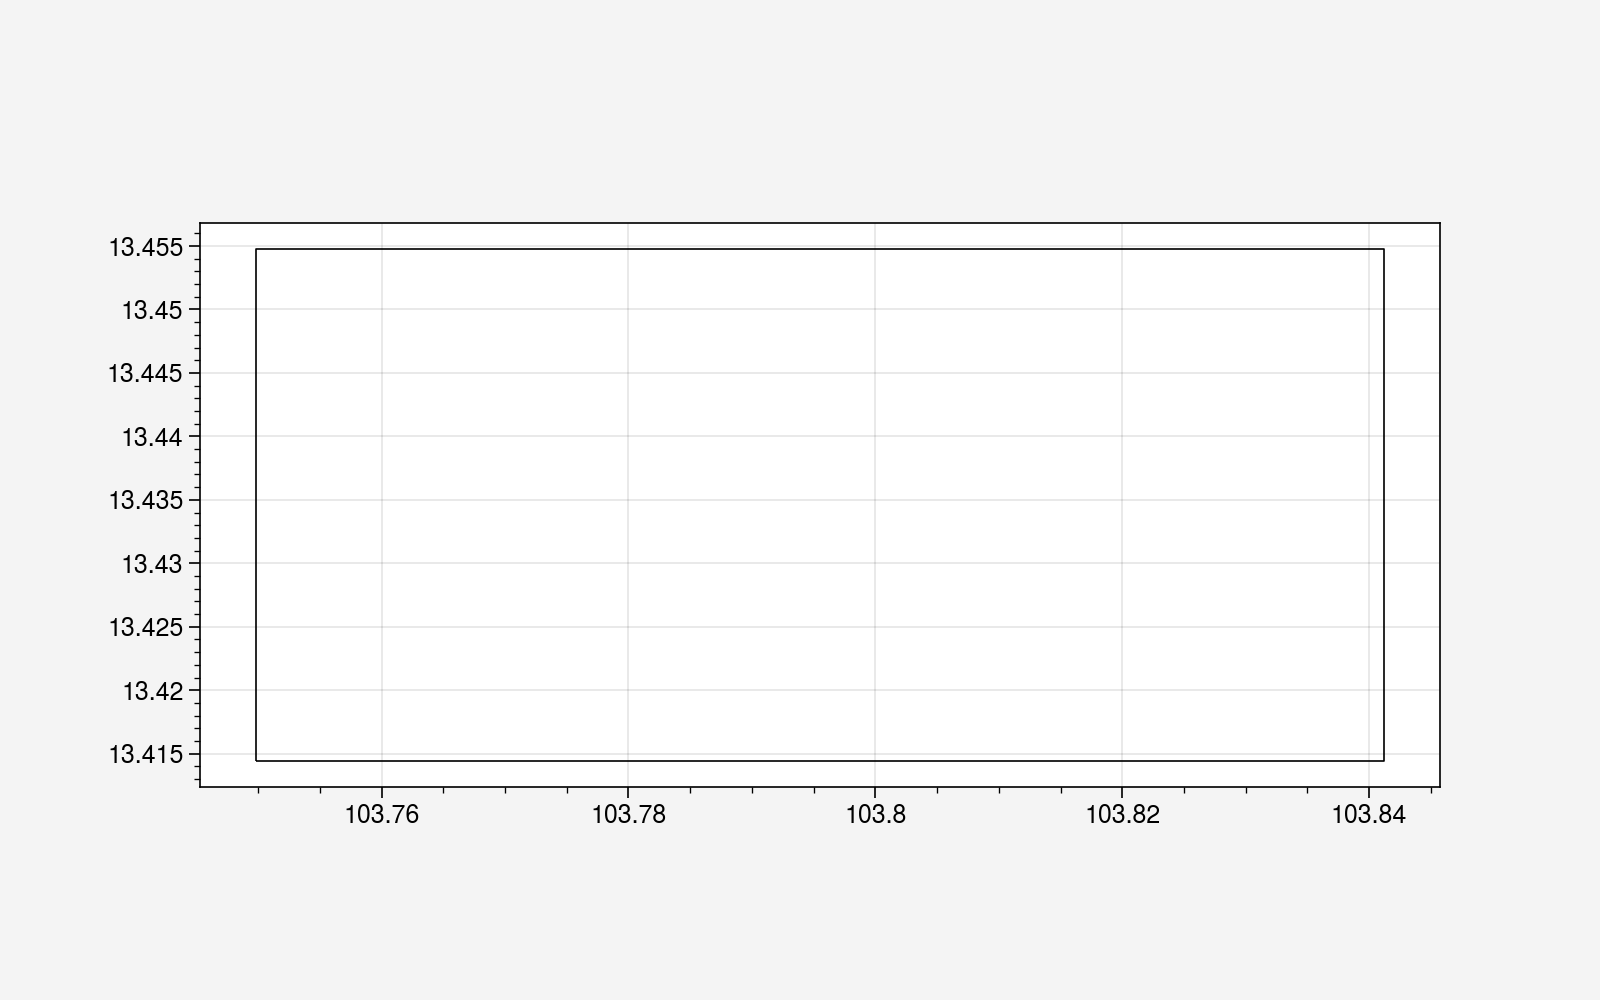

In [113]:
# Read TSL boundary data
bound_fp = 'data/lake_boundary/lake_boundary.shp'
lake= gpd.read_file(bound_fp)

# Plot the shape
fig, ax = plt.subplots(figsize=(8, 5))
lake.plot(ax=ax, edgecolor ='black', facecolor = 'None');

In [120]:
# Assert the crs of both data
lake.crs == image.crs

False

In [121]:
# Re-project the Polygon into same CRS as the grid 
lake_projected = lake.to_crs(crs=image.crs)

# Print crs
lake_projected.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [123]:
# Assert the crs of both data
lake_projected.crs == image.crs

True

Use the following a function to convert geodataframe of the shapefile to a list of geometry coordinates

In [124]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [127]:
# Extract feature coordinate
lake_coord = getFeatures(lake_projected)

print(lake_coord)

[{'type': 'Polygon', 'coordinates': [[[103.74985374341003, 13.414390162944533], [103.74985374341003, 13.454795449399878], [103.84117759594909, 13.454795449399878], [103.84117759594909, 13.414390162944533], [103.74985374341003, 13.414390162944533]]]}]


Mask image

In [128]:
from rasterio.mask import mask

In [129]:
# Mask raster
clip, transform = mask(image, lake_coord, crop=True)

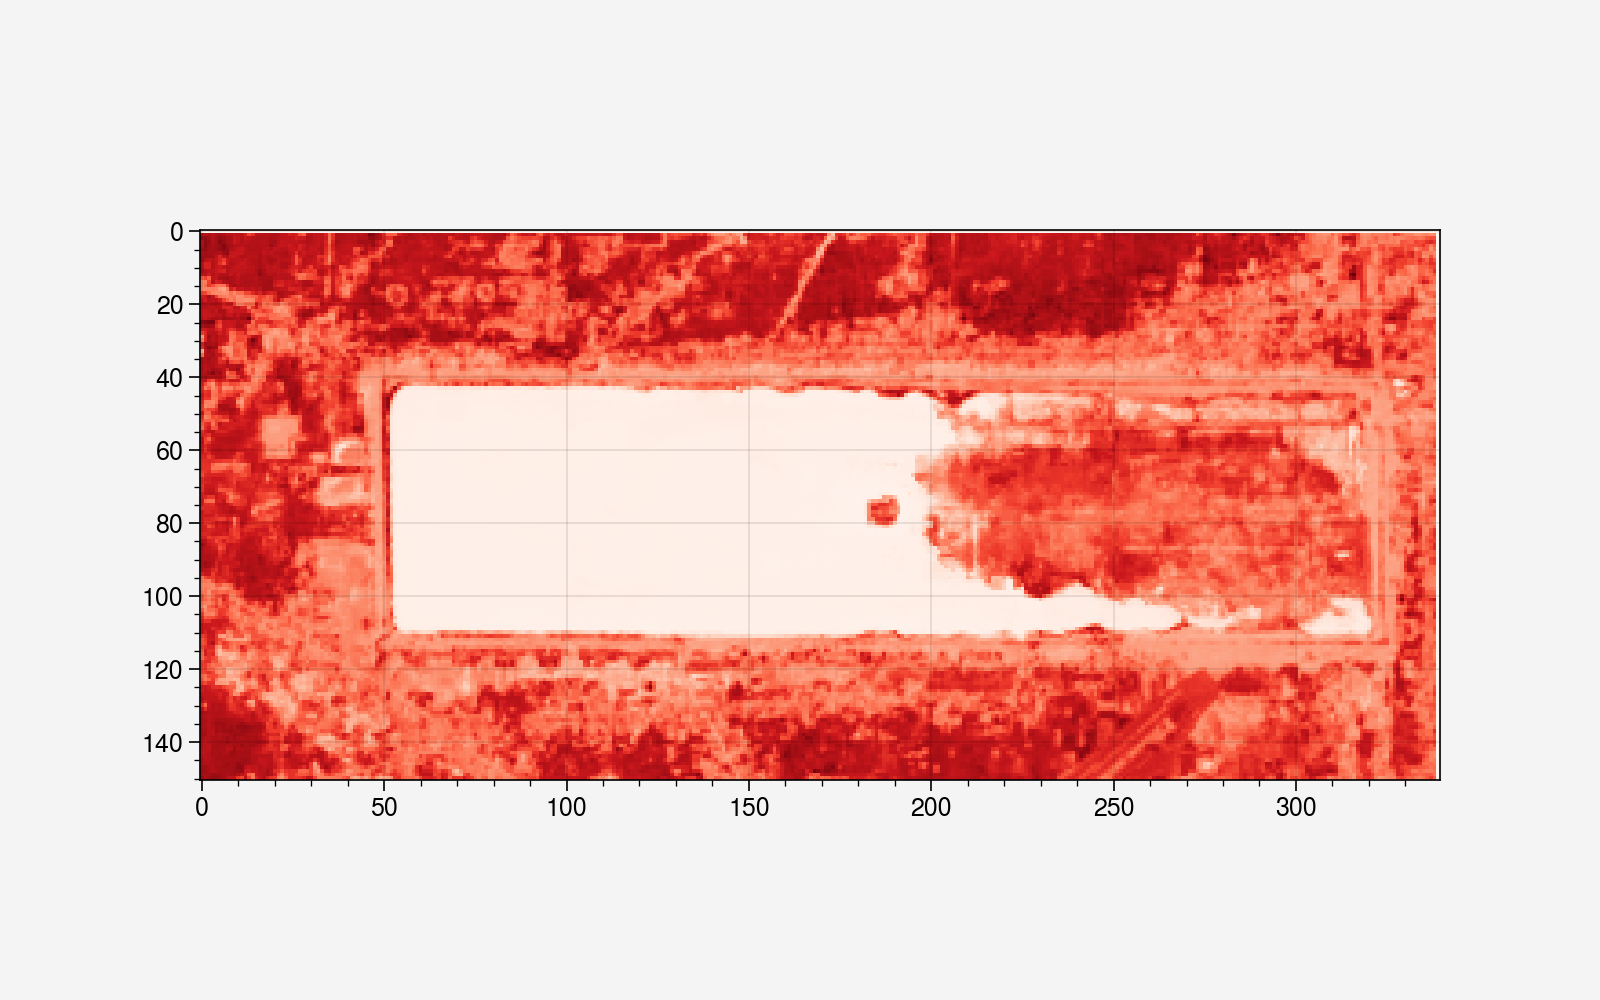

In [131]:
# Visualize NIR
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(clip[5], cmap='Reds')

### Exporting raster

Here we will learn how to export the result of masked raster to `GeoTIFF` file. As you know, the result is in `numpy.ndarray` and it doesn't have metadata information. Hence, it's important to insert such information into the array to create a *dictionary data* or *raster dataset*. To do this, we will copy metadata information from original raster image by using `.copy()`-function.

In [136]:
import os
from pyproj import CRS

In [134]:
# Copy the metadata
meta = image.meta.copy()
meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 767,
 'height': 354,
 'count': 12,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.00026949458523585647, 0.0, 103.73924564069058,
        0.0, -0.00026949458523585647, 13.483622583105607)}

In [135]:
# Update the metadata
meta.update({'driver': 'GTiff',
                 'dtype': 'float32',
                 'nodata': None,
                 'width': clip.shape[2],
                 'height': clip.shape[1],
                 'crs': CRS.from_epsg(4326), # or just img.crs
                 'count':12,
                 'transform': transform
                })

In [139]:
# outputh path
out_fp = "output"

# Output raster
output = os.path.join(out_fp, "clipped-image.tif")

output

'output/clipped-image.tif'

Read more about [Writing Datasets](https://rasterio.readthedocs.io/en/latest/topics/writing.html).

The data type is changed from float 64 to float 32 to reduce the file size of output using `.astype(np.float32)`.

In [140]:
with rasterio.open(output, "w", **meta) as dest:
    dest.write(clip.astype(np.float32))

### Merge raster

In [142]:
import os
import glob
import rasterio
from rasterio.merge import merge

Read all images in folder

In [152]:
# Set directory path to the data files by using (*)-sign to omit unecessary text when searching for files
lake_fp = 'data/lake/l*.tif'

files = os.path.join(lake_fp)

# use `glob` -function to list all files from directory
lake_imgs = glob.glob(files)
lake_imgs

['data/lake/lake_2.tif',
 'data/lake/lake_3.tif',
 'data/lake/lake_4.tif',
 'data/lake/lake_1.tif']

In [153]:
# List for storing the raster image
src_files = []

# Open each raster files by iterating and then append to our list
for raster in lake_imgs:
    # open raster file
    files = rasterio.open(raster)
    
    # add each file to our list
    src_files.append(files)
    
src_files

[<open DatasetReader name='data/lake/lake_2.tif' mode='r'>,
 <open DatasetReader name='data/lake/lake_3.tif' mode='r'>,
 <open DatasetReader name='data/lake/lake_4.tif' mode='r'>,
 <open DatasetReader name='data/lake/lake_1.tif' mode='r'>]

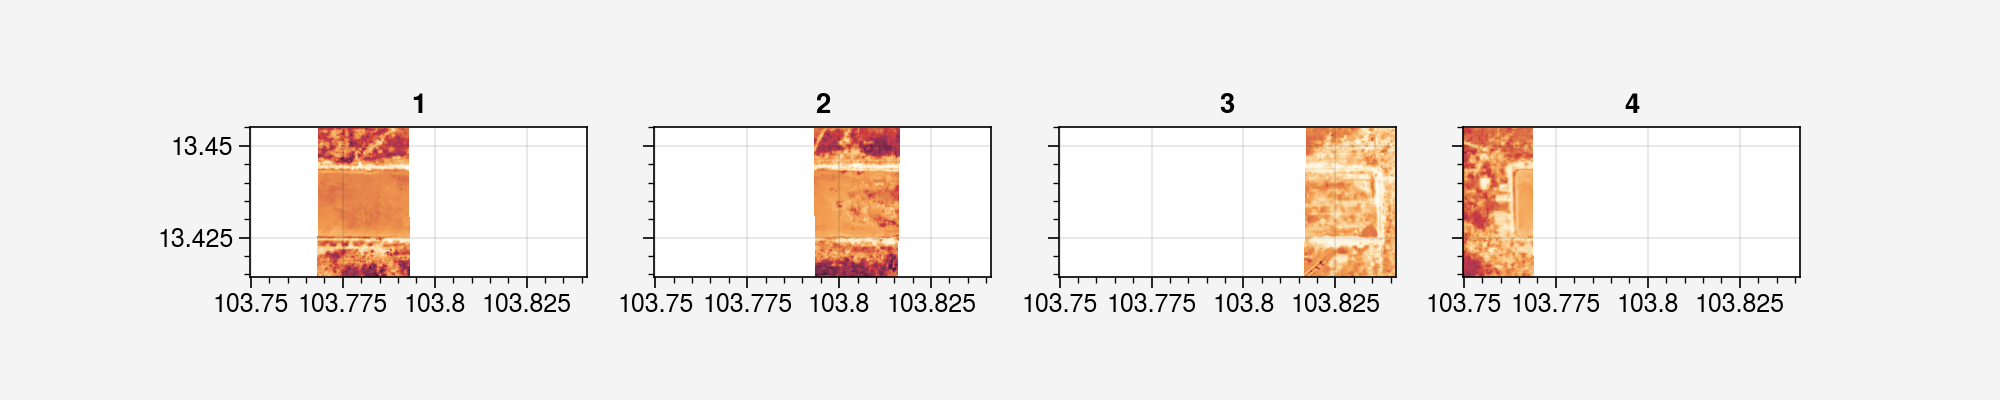

In [167]:
# Create 5 figures in the same row
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(10, 2), sharey=True)

# Show each image in each figure
show(src_files[0], ax=ax1, title = '1')
show(src_files[1], ax=ax2, title = '2')
show(src_files[2], ax=ax3, title = '3')
show(src_files[3], ax=ax4, title = '4')

plt.show();

Merge all images

In [168]:
# Merge function returns a single mosaic array and the transformation info
merge, out_trans = merge(src_files)

In [169]:
# Check shape of mosaic
merge.shape

(12, 151, 340)

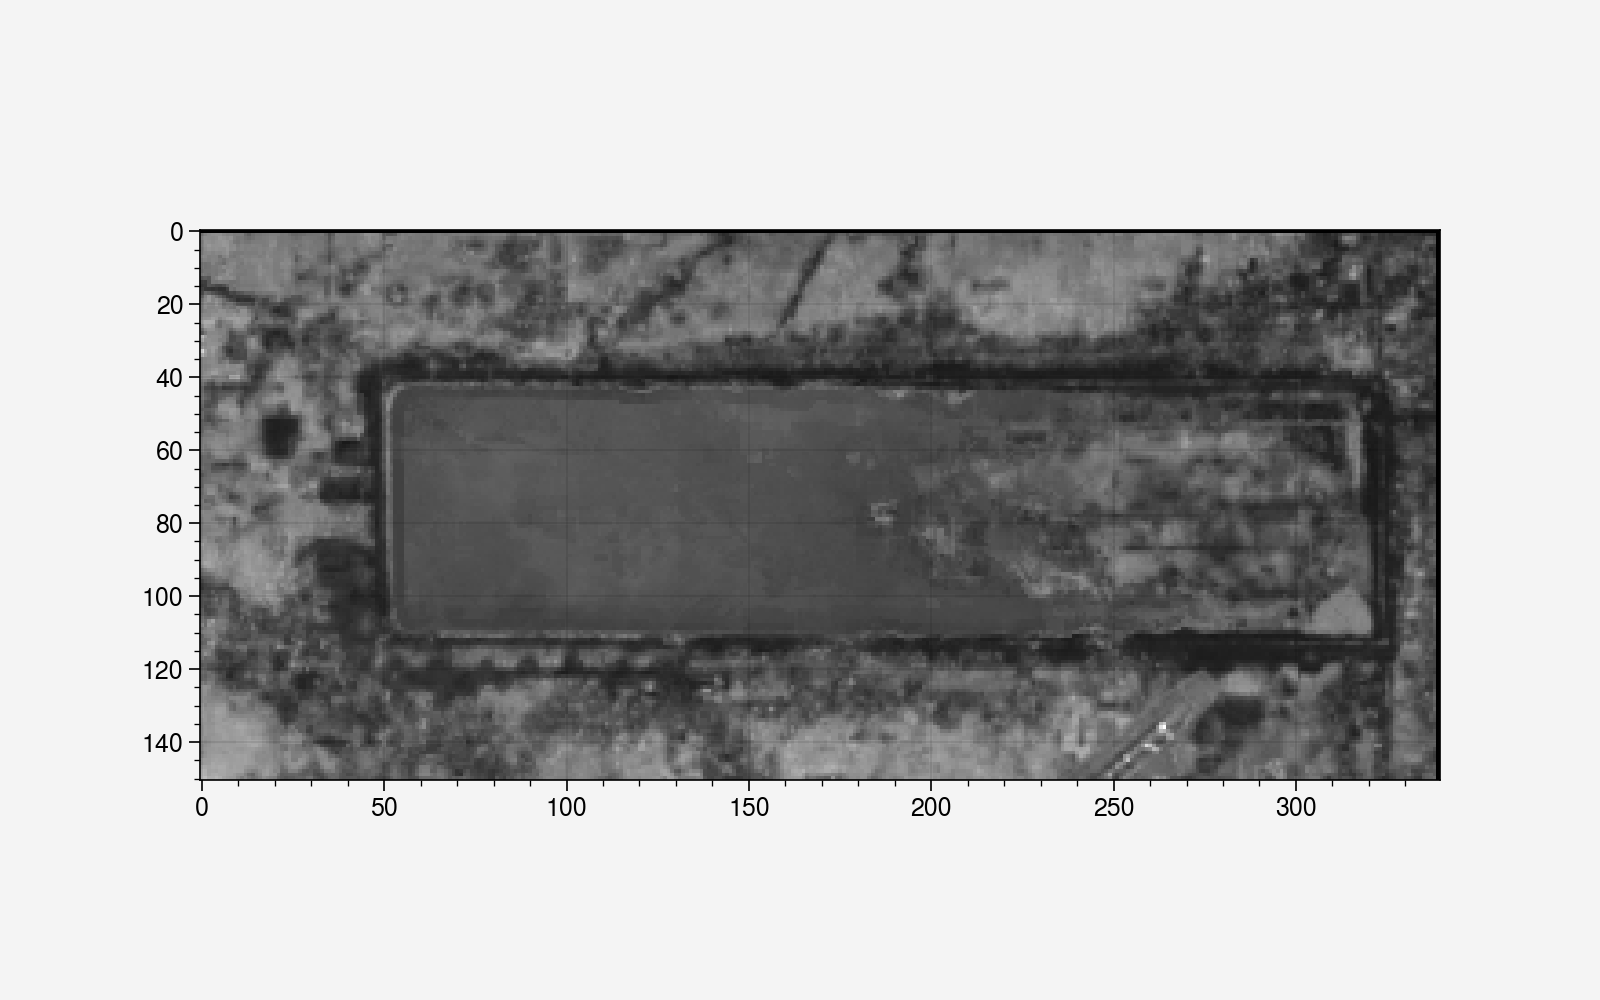

In [173]:
# Visualize merged image
fig, ax = plt.subplots(figsize=(8, 5))

ax.imshow(merge[0], cmap='gray')


Export merged image

In [177]:
# Copy the metadata
out_meta = src_files[0].meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "dtype": "float32",
                 "nodata": None and 0,
                 "height": merge.shape[1],
                 "width": merge.shape[2],
                 "transform": out_trans,
                 "count": 12,
                 "crs": src_files[0].crs
                 }
                )
# Output raster
output = os.path.join("output/merged_raster.tif")

# Write the mosaic raster to computer
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(merge)

### Raster algebra

Calcuate water index - NDWI

In [179]:
def get_ndwi(green, nir):
    
    # By default numpy will complain about dividing with zero values. 
    # We need to change that behaviour because we have a lot of 0 values in our data.
    np.seterr(divide='ignore', invalid='ignore')
    
    # NDWI formula
    ndwi = (green - nir) / (green + nir)
    
    return ndwi

In [181]:
# Read the grid values into numpy arrays
green = image.read(3)
nir = image.read(5)

ngreen = normalize(green)
nnir = normalize(nir)

In [182]:
# Calculate NDWI
NDWI = get_ndwi(ngreen, nnir)

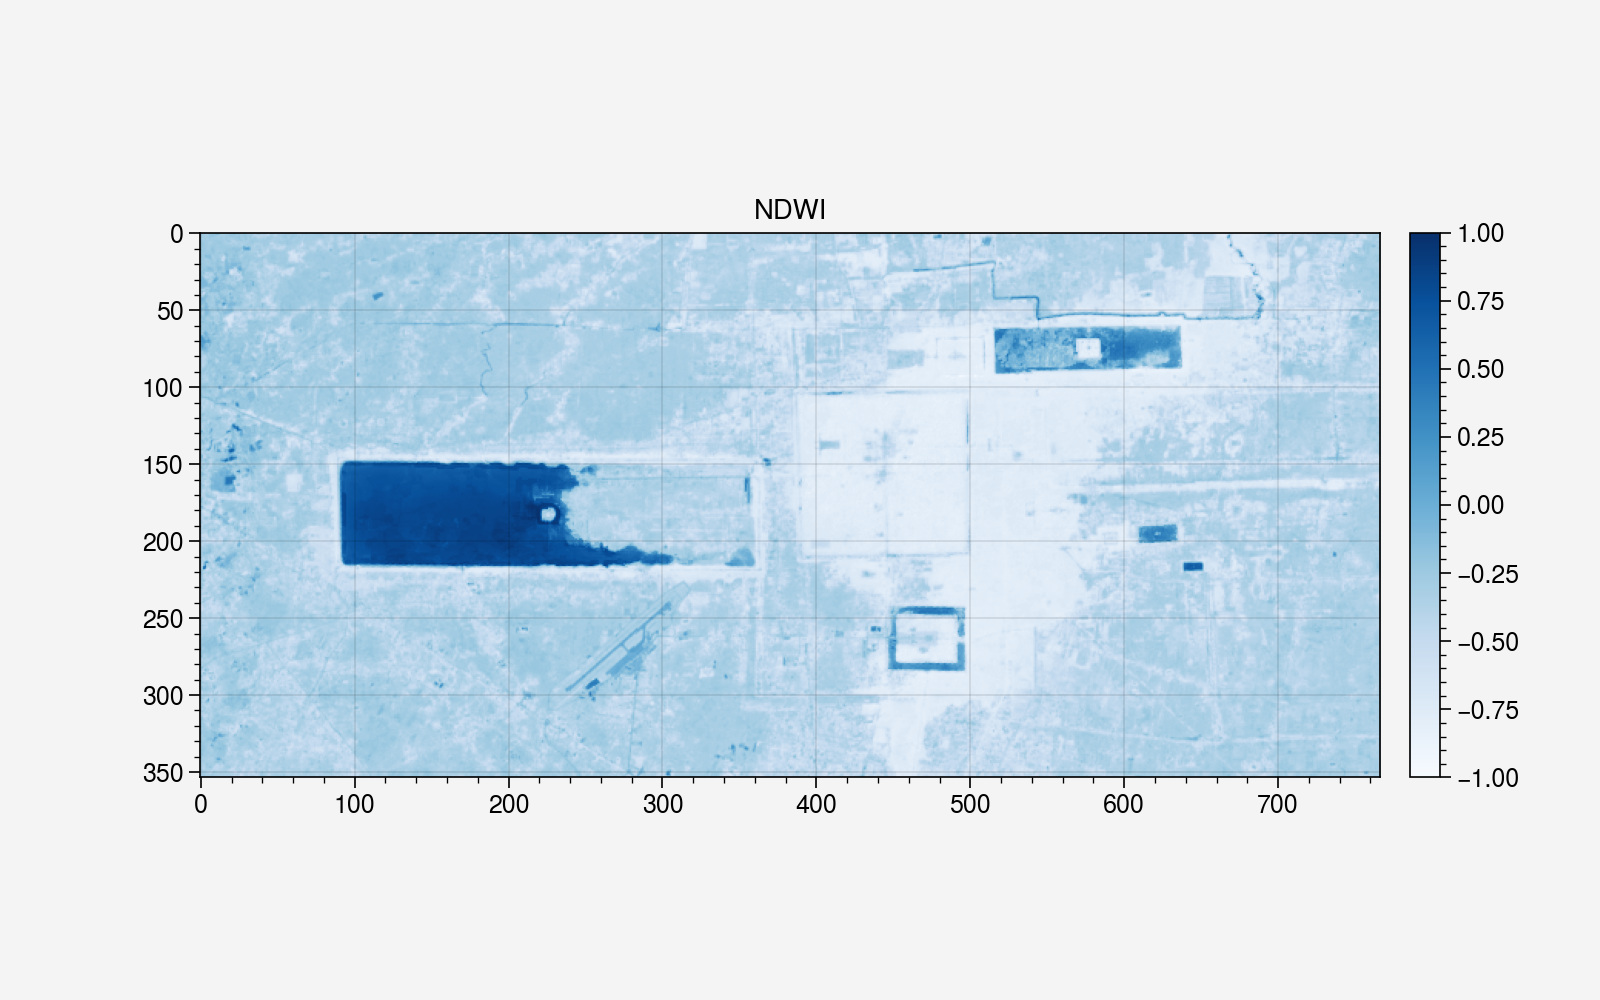

In [220]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(NDWI, cmap='blues')

# new axes at right side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.15)
fig.colorbar(im, ax=ax, cax=cax)

# Set title
ax.set_title('NDWI')

plt.savefig('output/ndwi.png', dpi=150)
plt.show();

### Extract water area

In [218]:
# extract NDWI above 0
wat_area = np.where(NDWI < 0, np.nan, NDWI) # np.where(Condition, New Value, Array to re-write)

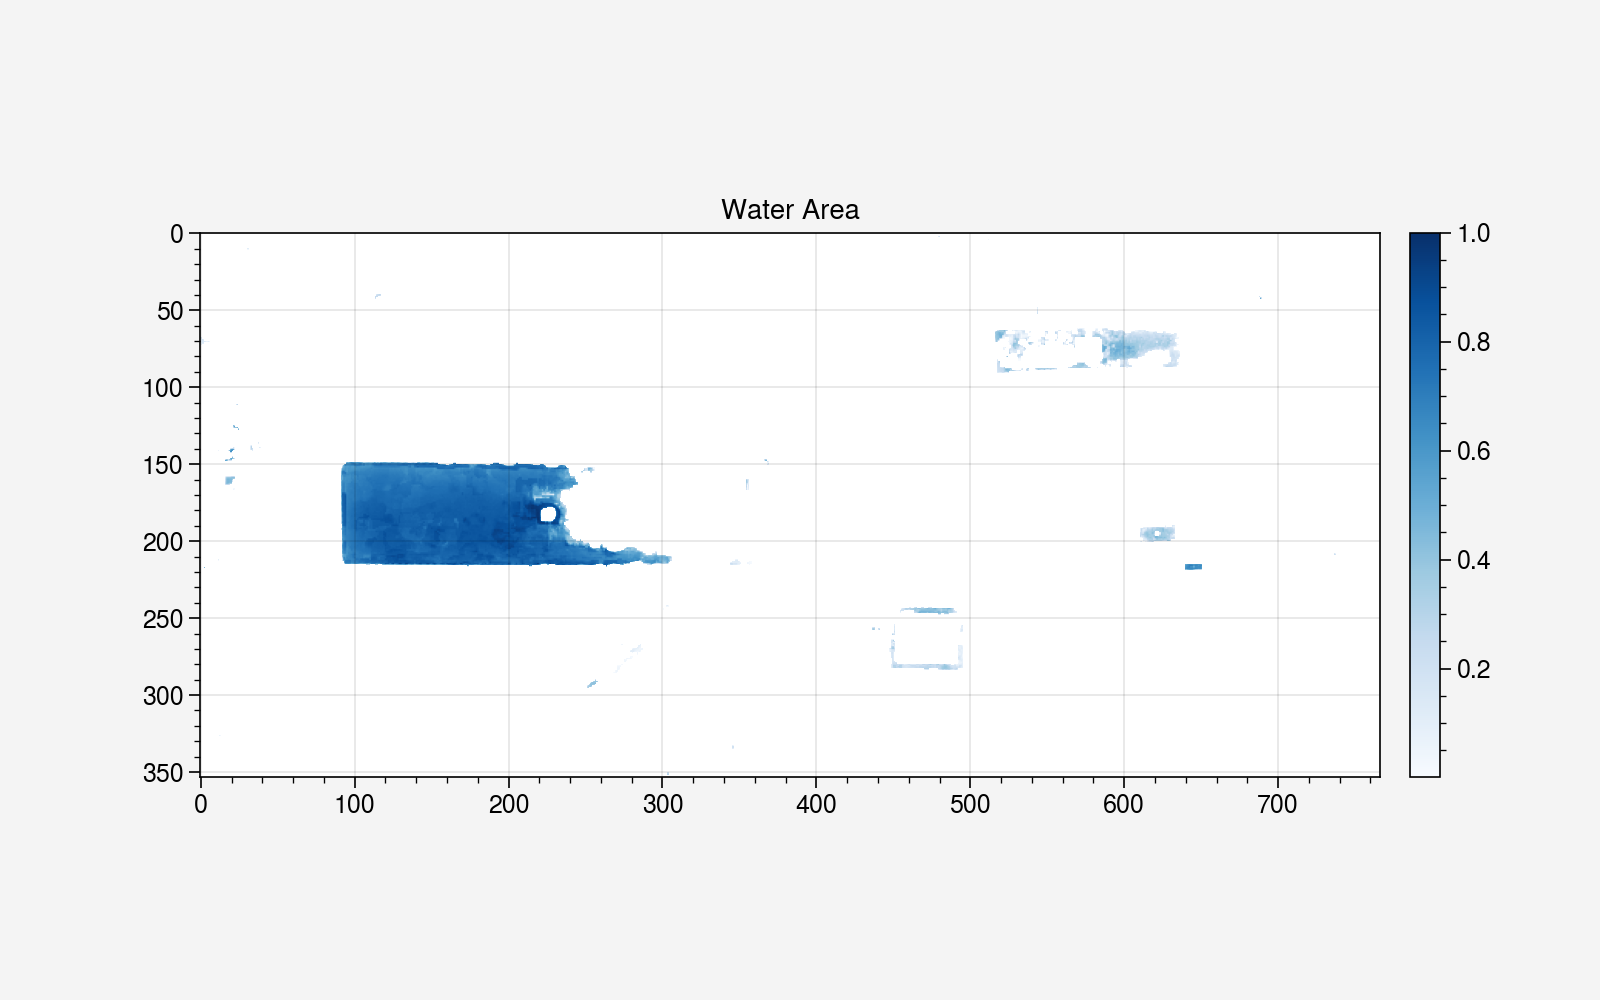

In [219]:
# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

im = ax.imshow(wat_area, cmap='blues')

# new axes at right side of image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.15)
fig.colorbar(im, ax=ax, cax=cax)

# Set title
ax.set_title('Water Area')

plt.show();

Export water area

In [221]:
# Copy the metadata
out_meta = image.meta.copy()

# Update the metadata
out_meta.update({"driver": "GTiff",
                 "dtype": 'float32',
                 "nodata": None,
                 "height": image.shape[0],
                 "width": image.shape[1],
                 "transform": image.transform,
                 "count": 1,
                 "crs": image.crs
                 }
                )
# Output raster
output = os.path.join("output/water_area.tif")

# Write water area
with rasterio.open(output, "w", **out_meta) as dest:
    dest.write(wat_area, indexes = 1)



---



---

